In [273]:
import os
import _pickle as pickle
import numpy as np

Results = {'TTC' : {}, "parameters" : {}}

for folder in os.listdir("Results/"):
    if "DS_Store" not in folder:
        for file in os.listdir(f"Results/{folder}"):
            if "DS_Store" not in file:
                with open(f'Results/{folder}/{file}', 'rb') as f:
                    Temp_Results = pickle.load(f)
                    Results["TTC"][file] = Temp_Results["TTC"][f"Results/{folder}/{file}"]
                    Results["parameters"][file] = Temp_Results["parameters"]

# Time to consensus

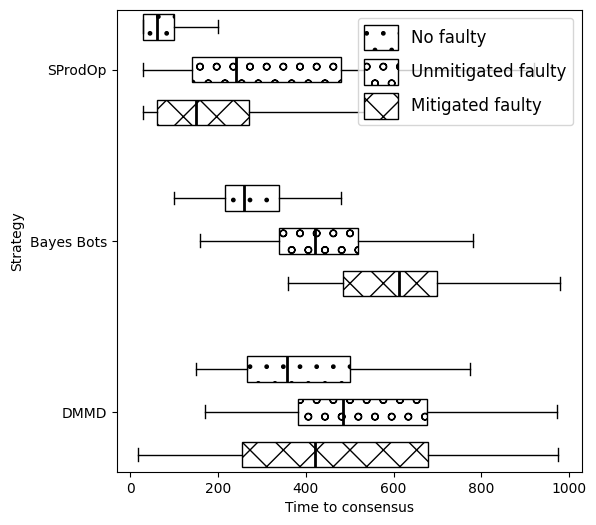

In [274]:
# 1 graph, with three clusters of box plots
# - No faulty agents
# - Mitigated faulty agents
# - Unmitigated faulty agents

import matplotlib.pyplot as plt

# Set up graph
fig, ax = plt.subplots(1,1, figsize = (6,6), dpi=100)

positions = np.array([12, 11.75, 11.5])

# Define hatch patterns
hatch_patterns = ['.', 'o', 'x']#, '-', '|', 'o', '*']


# Plot data
for i, decision_strategy in enumerate(["SProdOp", "BBots", "DMMD"]):
    # Non faulty
    box = ax.boxplot((Results['TTC'][decision_strategy+"-NF"], # No faulty agents
                Results['TTC'][decision_strategy+"-F"],  # Unmitigated faulty agents
                Results['TTC'][decision_strategy+"-MF"]), # Mitigated faulty agents
                vert=False, positions=positions, sym='',
                patch_artist=True,
                medianprops=dict(color='black',linewidth=2))
    positions -= 1
    

    # Set colours
    for i in range(3):
        box['boxes'][i].set_facecolor('white')  # Set box fill color to white
        box['boxes'][i].set_edgecolor('black')  # Set box edge color to black
        box['boxes'][i].set_hatch(hatch_patterns[i])

        #box['boxes'][1].set_hatch(hatch_patterns[1])
        #box['boxes'][2].set_hatch(hatch_patterns[2])

ax.legend([box['boxes'][0], box['boxes'][1], box['boxes'][2]], 
          ['No faulty', 'Unmitigated faulty', 'Mitigated faulty'],
          fontsize='large',
          handlelength=2,
          handleheight=2)
    

# Format
#decision_methods = ["SProdOp", "BBots", "DMMD"]


ax.set_ylim(9.4,12.1)

ax.set_ylabel('Strategy')
ax.set_yticks([11.75, 10.75, 9.75])
ax.set_yticklabels(['SProdOp', 'Bayes Bots', 'DMMD'])

ax.set_xlabel('Time to consensus')
    


plt.show()




In [275]:
for key, i in Results['TTC'].items():
    if "MF" in key or "NF" in key or key[-2:] == "-F":
        print(key + " " + str(len(i)))

SProdOp-NF 98
SProdOp-MF 100
BBots-F 98
DMMD-F 44
DMMD-NF 71
BBots-NF 100
DMMD-MF 59
BBots-MF 98
SProdOp-F 73


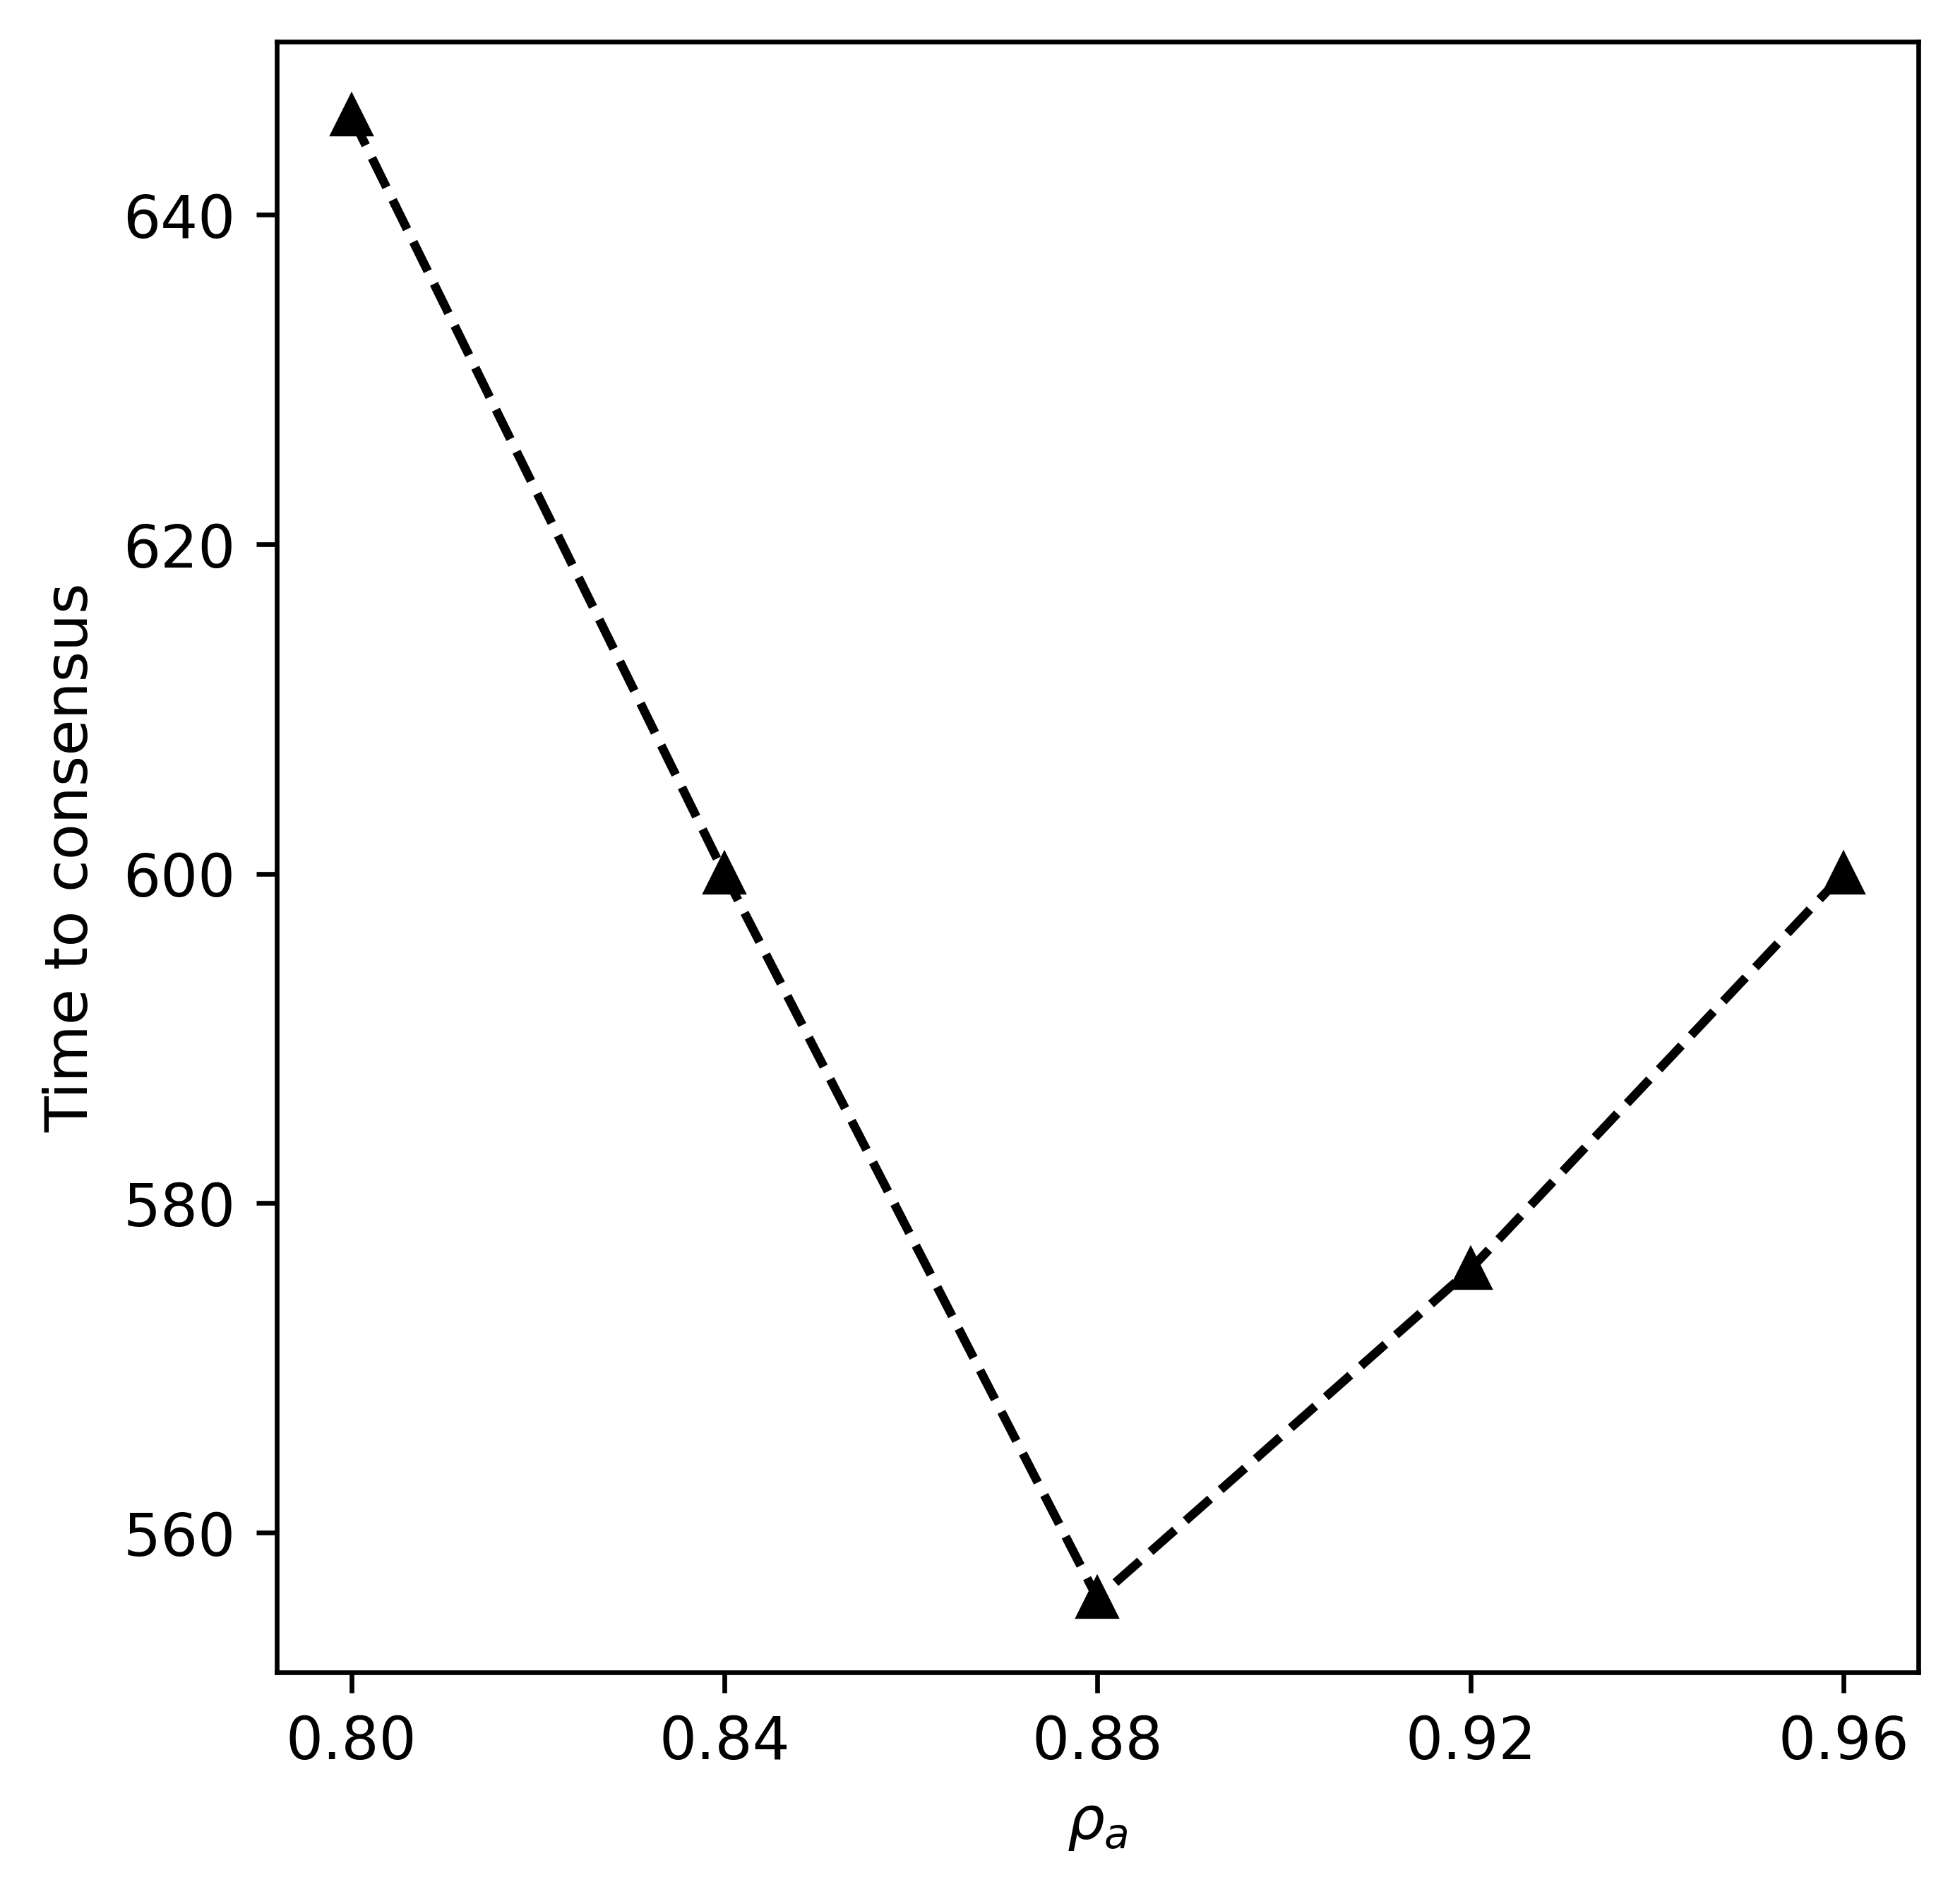

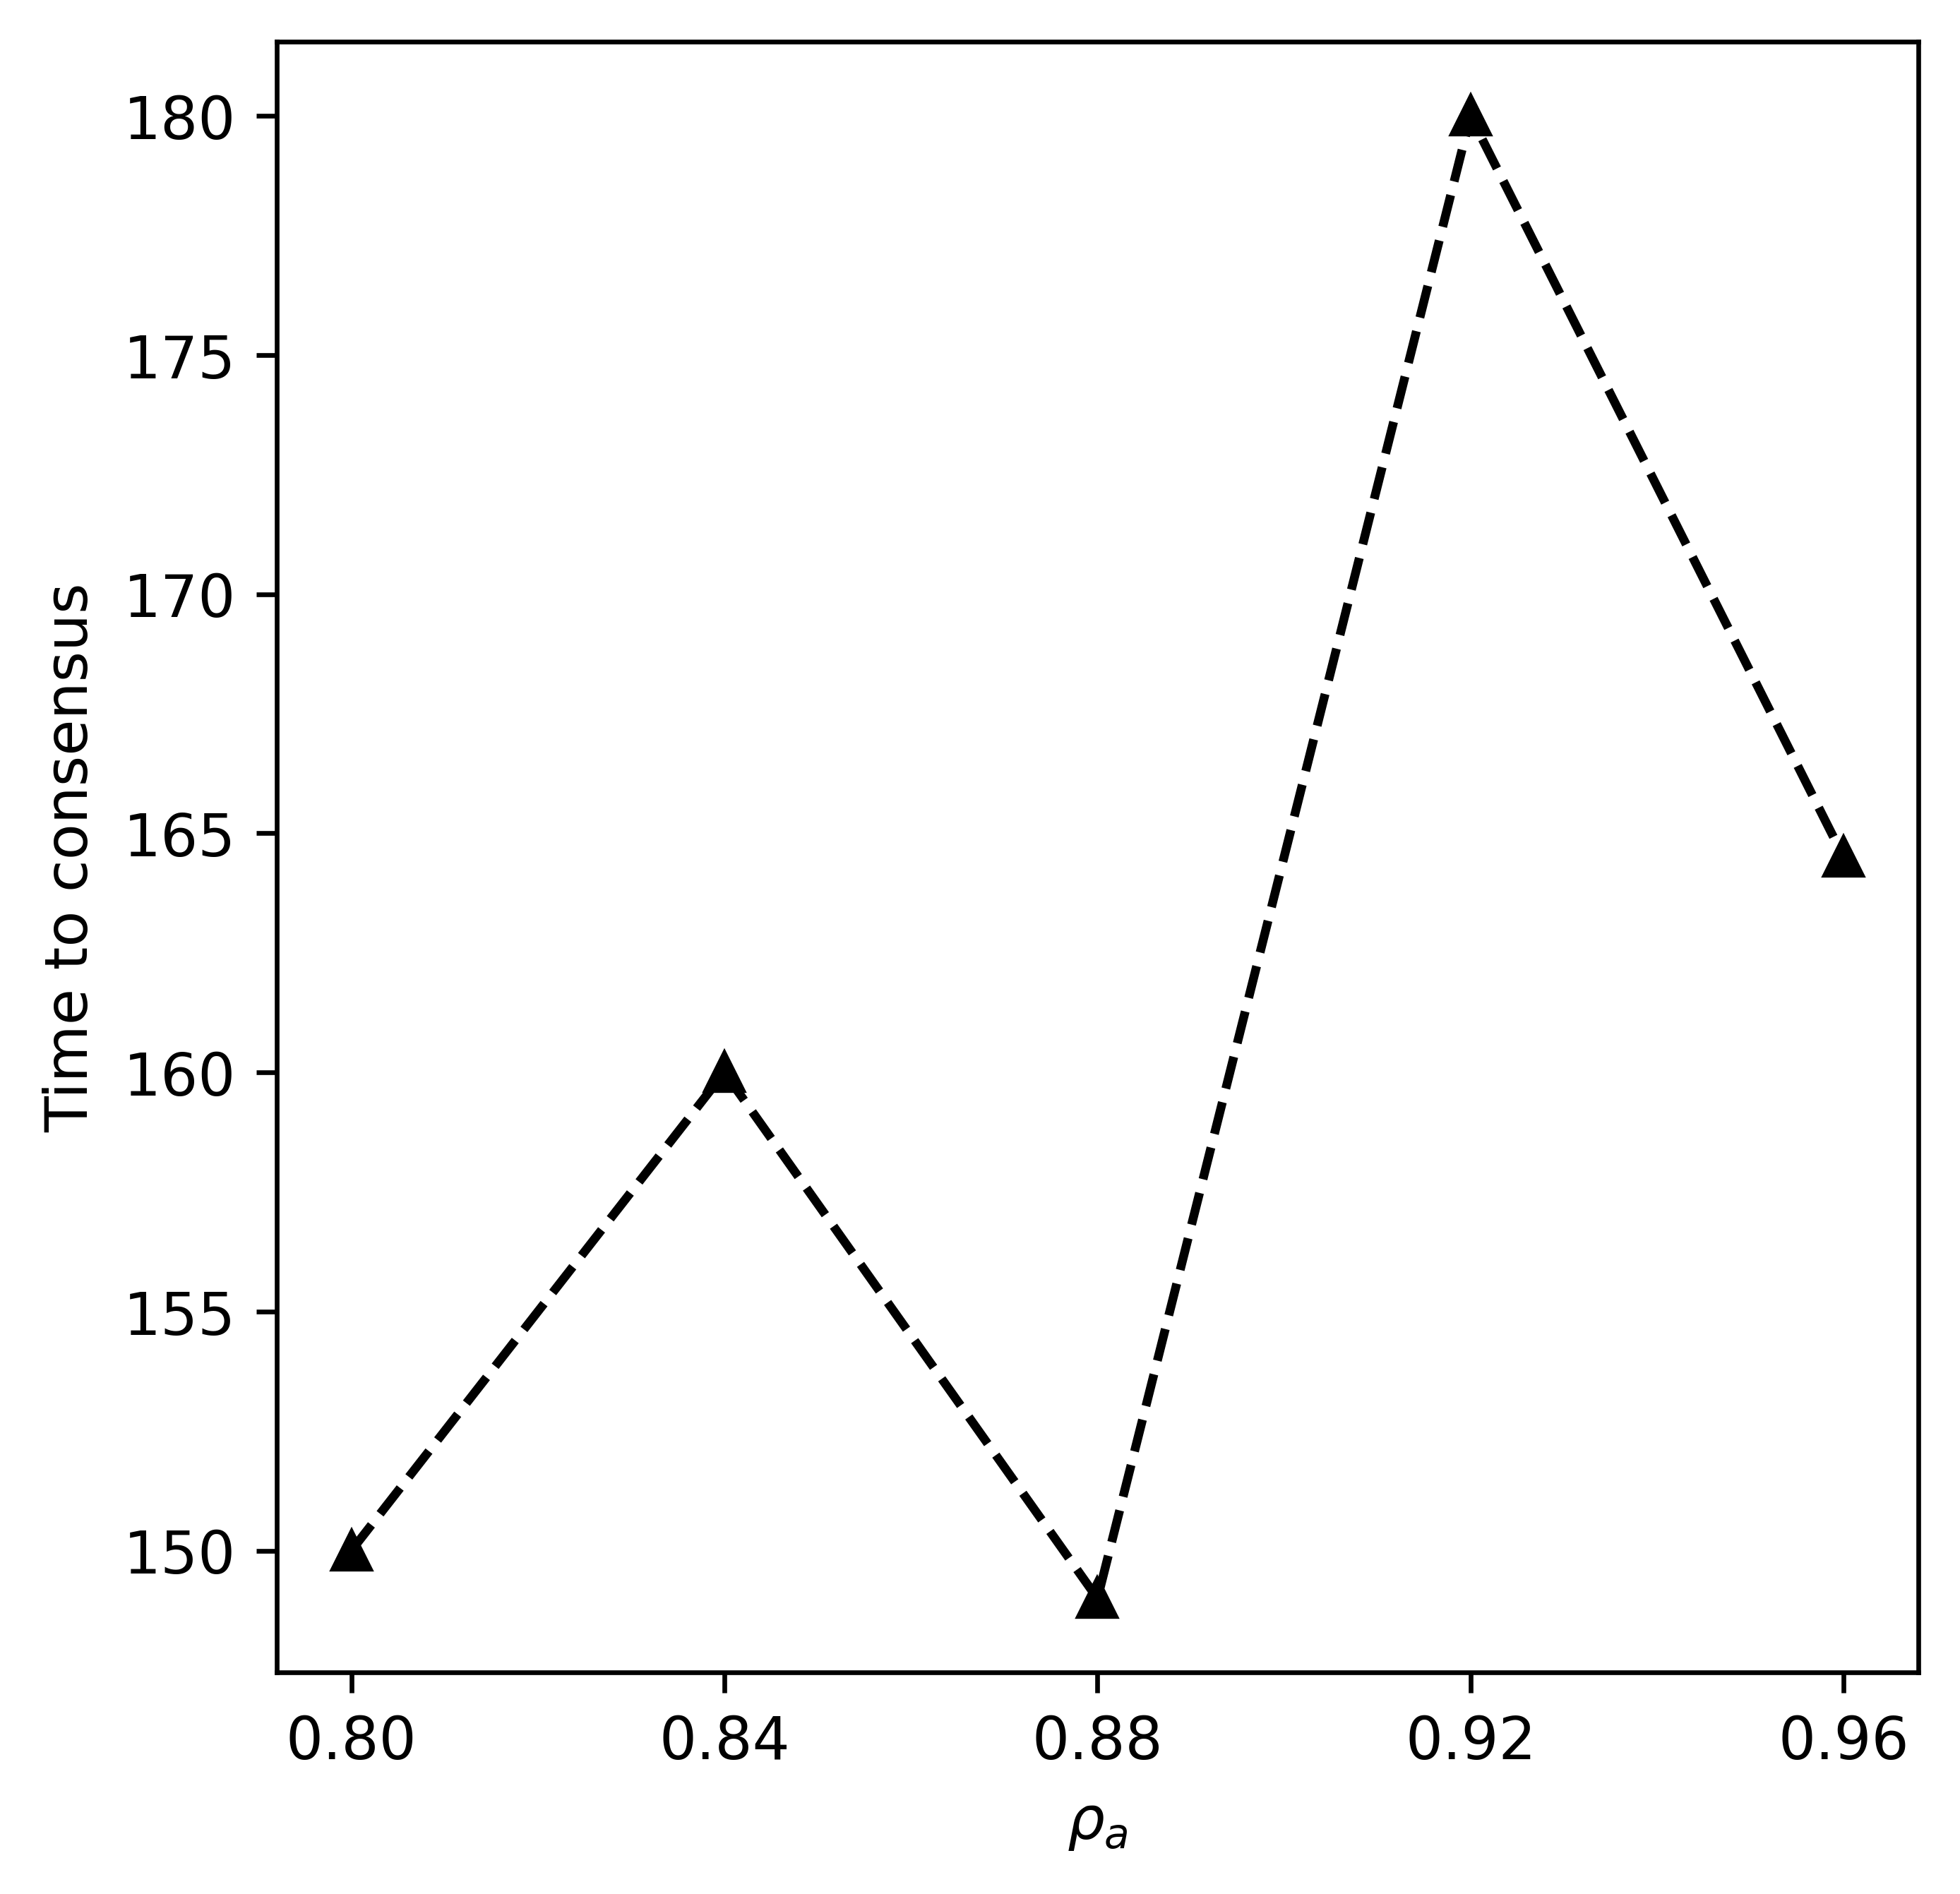

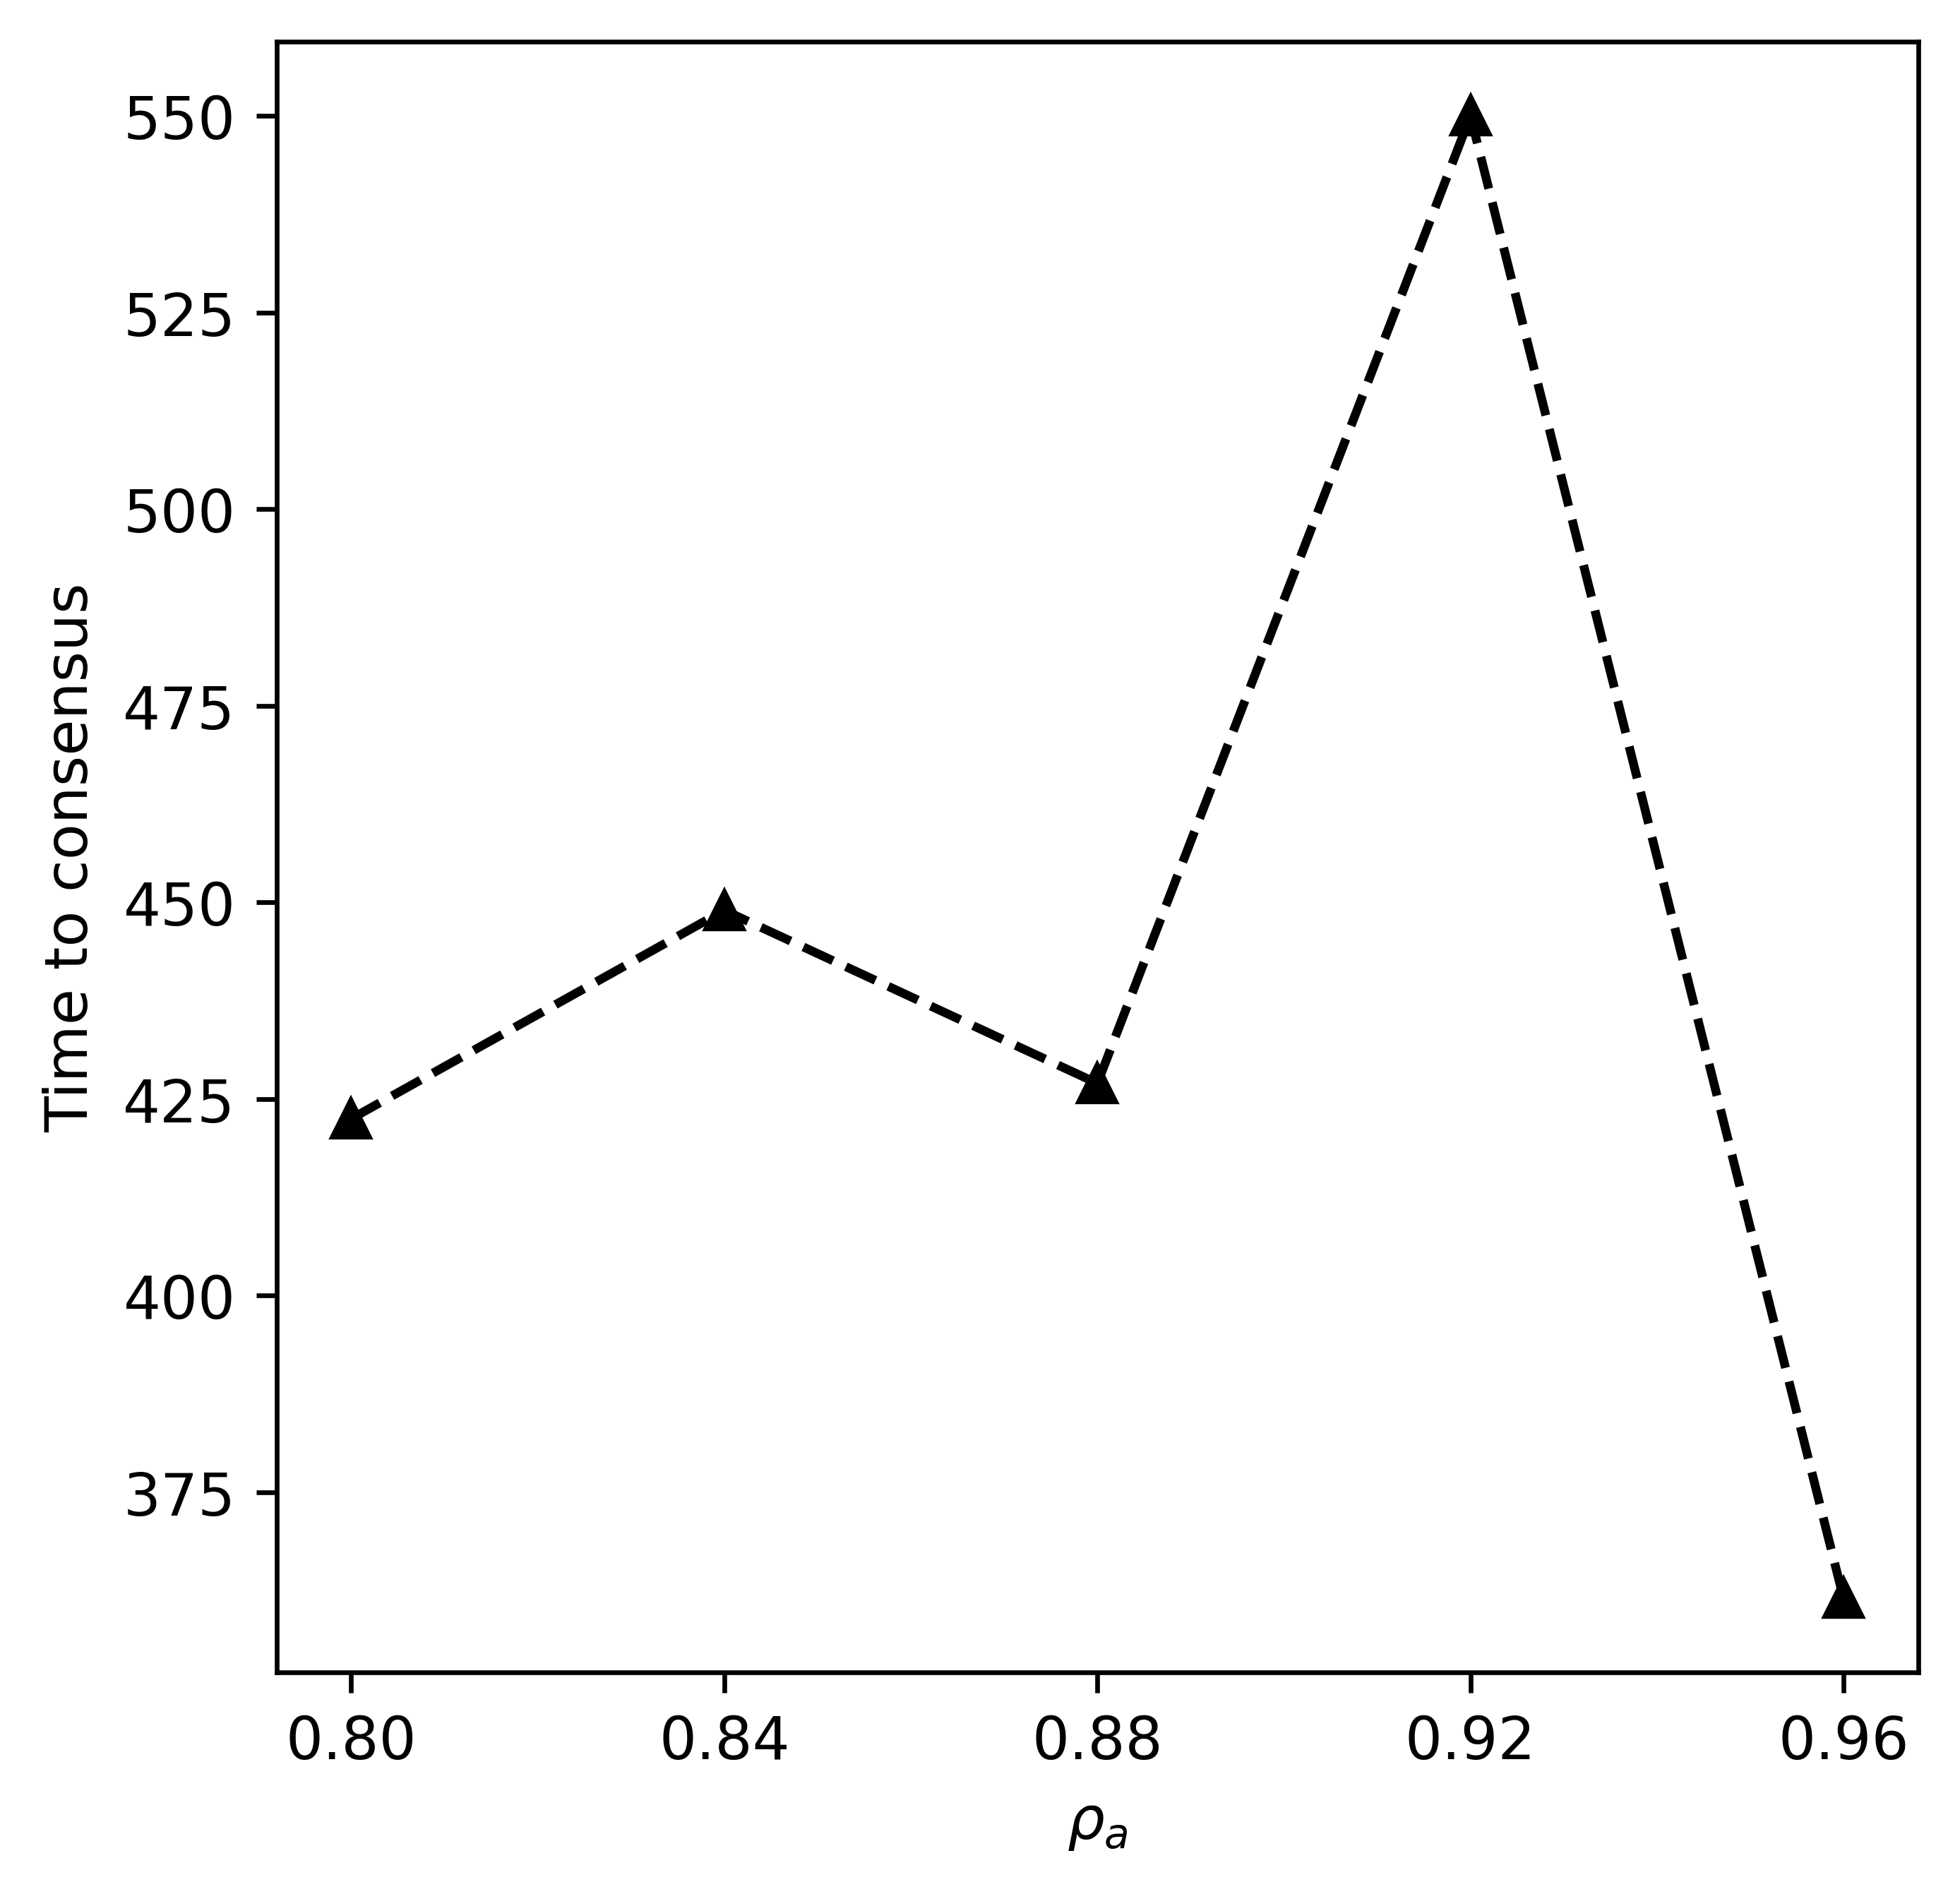

In [276]:
import matplotlib.pyplot as plt

parameters = [0.8, 0.84, 0.88, 0.92, 0.96]
sparameters = ['80', '84', '88', '92', '96']


mrkr = '--'
count=0
for strategy in ['BBots-TP-', 'SProdOp-TP-', 'DMMD-TP-']:
    # Set up graph
    fig, ax = plt.subplots(1,1, figsize = (5,5), dpi=600)
    ttcs = []
    for parameter in sparameters:
        time_to = np.median(Results['TTC'][strategy + parameter])
        ttcs.append(time_to)
    ax.plot(parameters, ttcs, '^', linestyle=mrkr, color='k')
    count += 1

    # Formatting
    ax.set_xticks(parameters)
    ax.set_ylabel('Time to consensus')
    ax.set_xlabel('$ρ_a$')


plt.show()

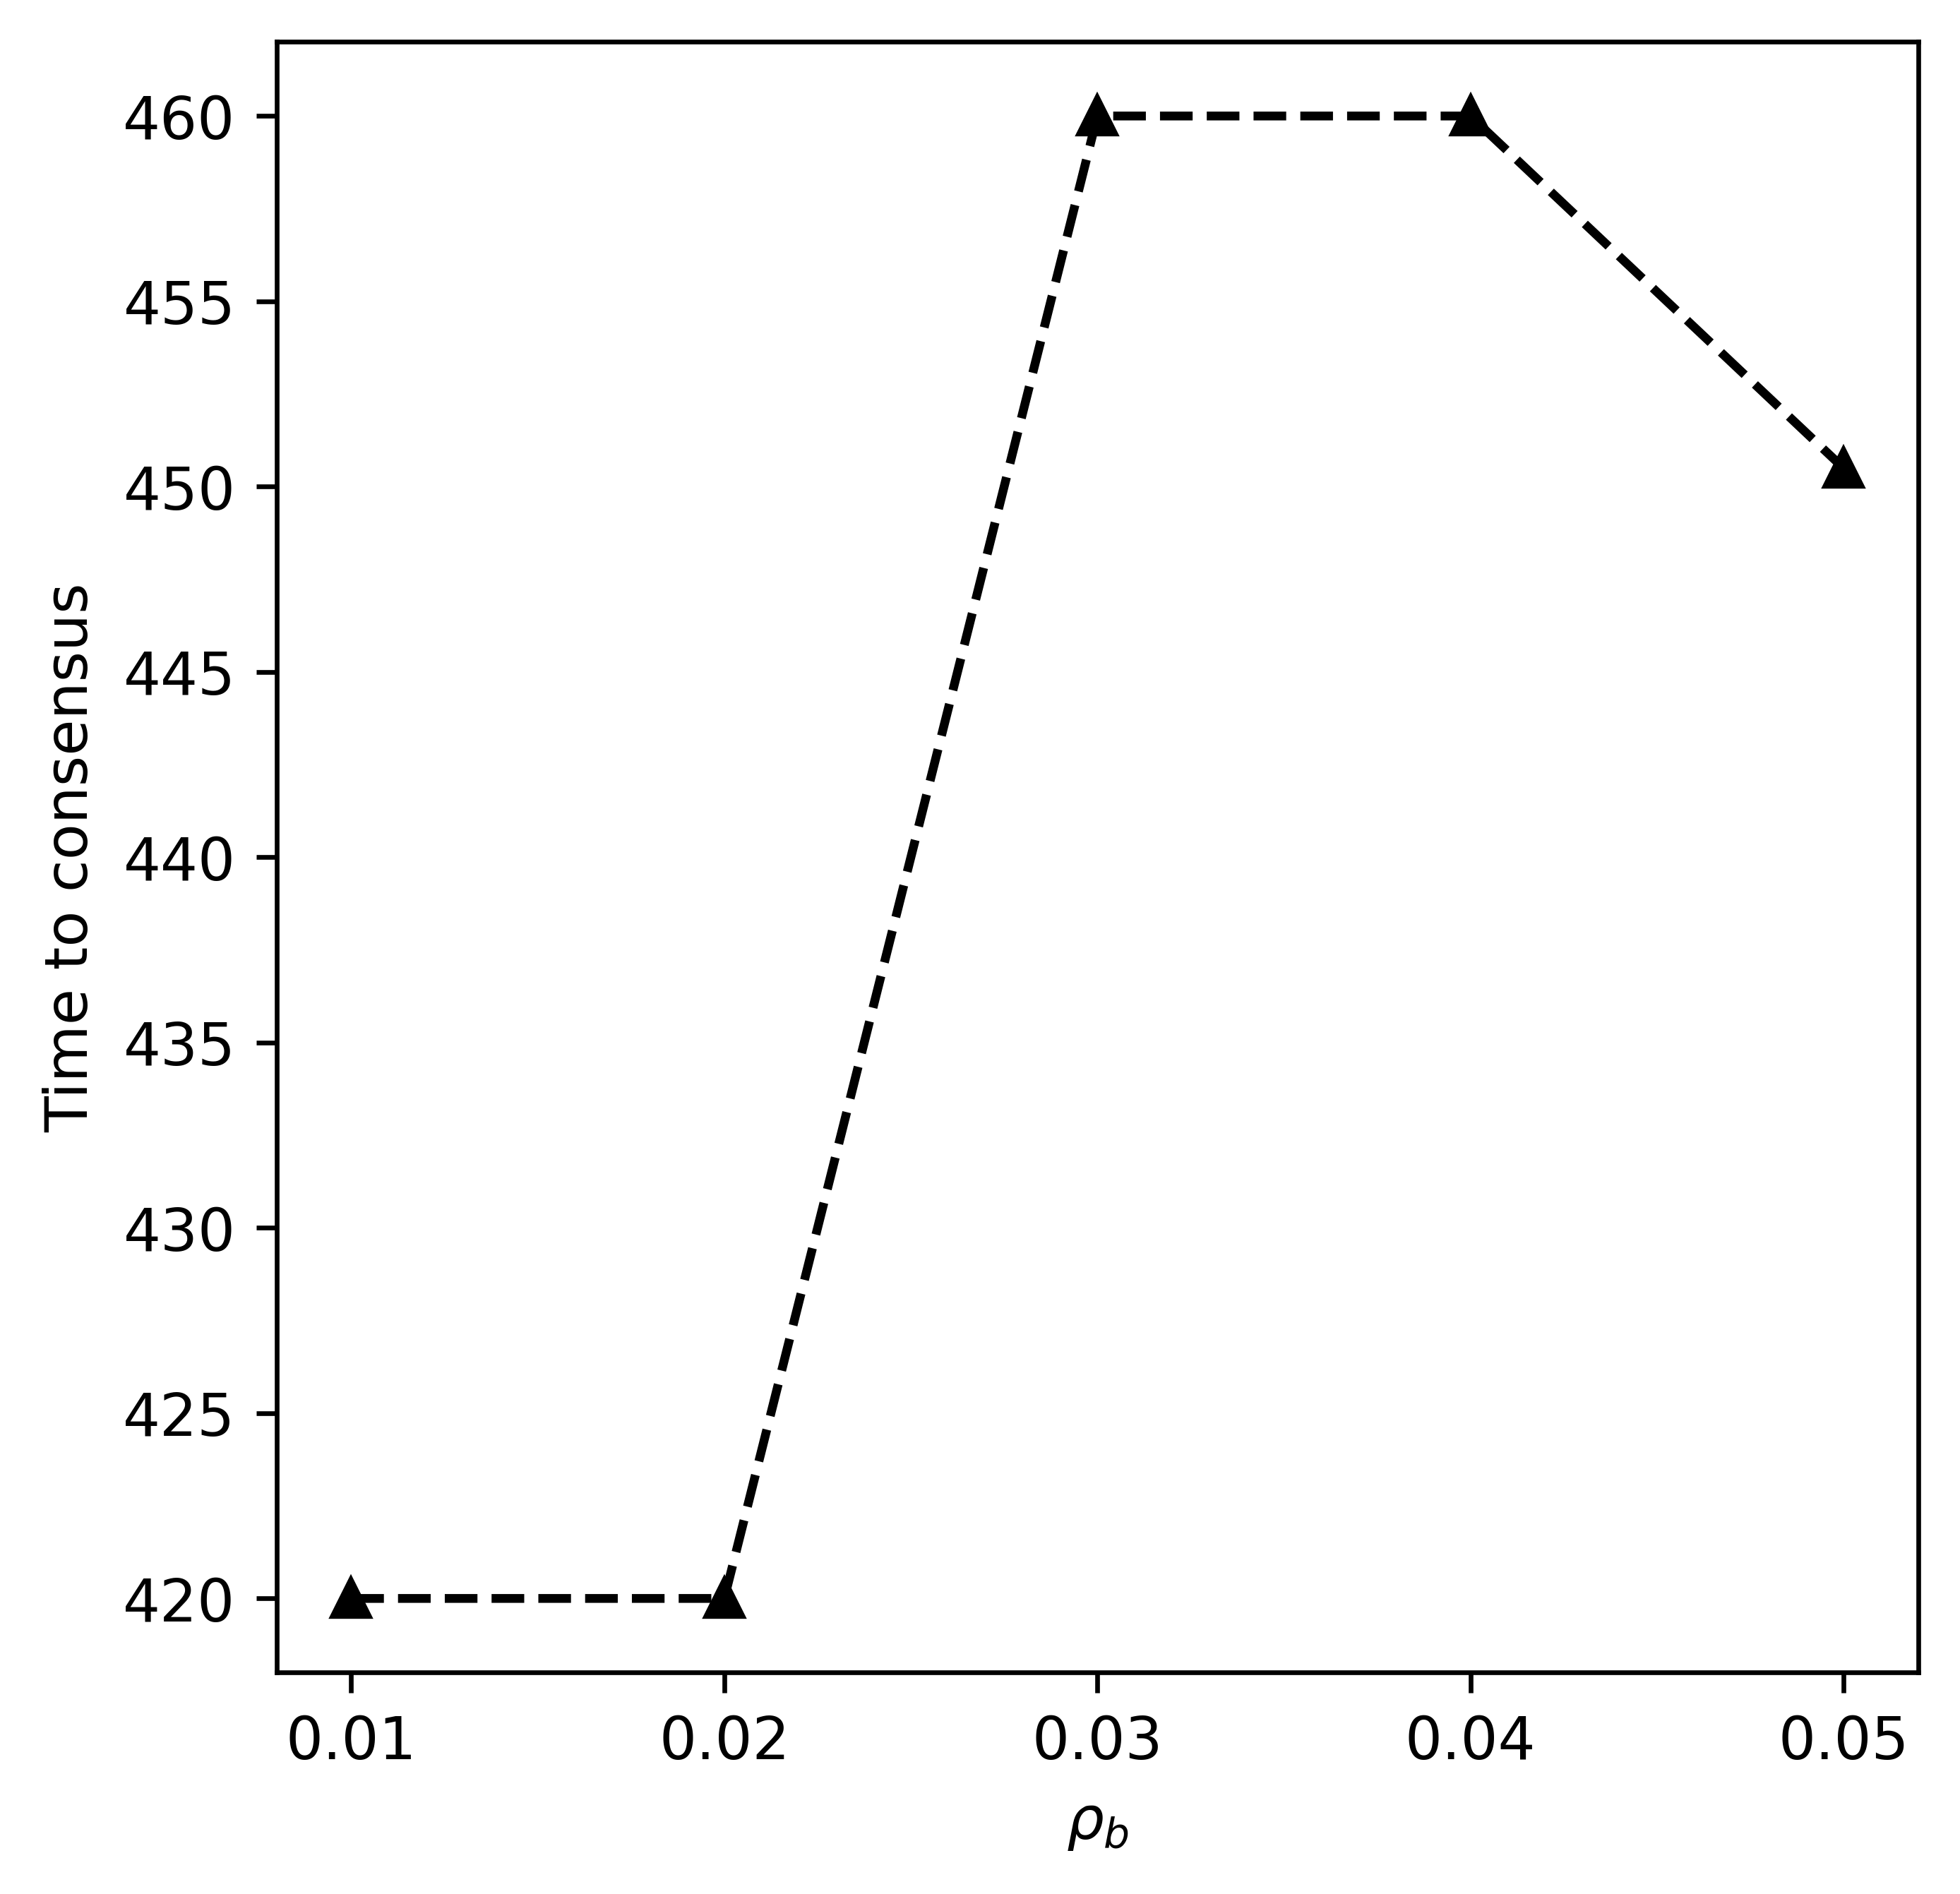

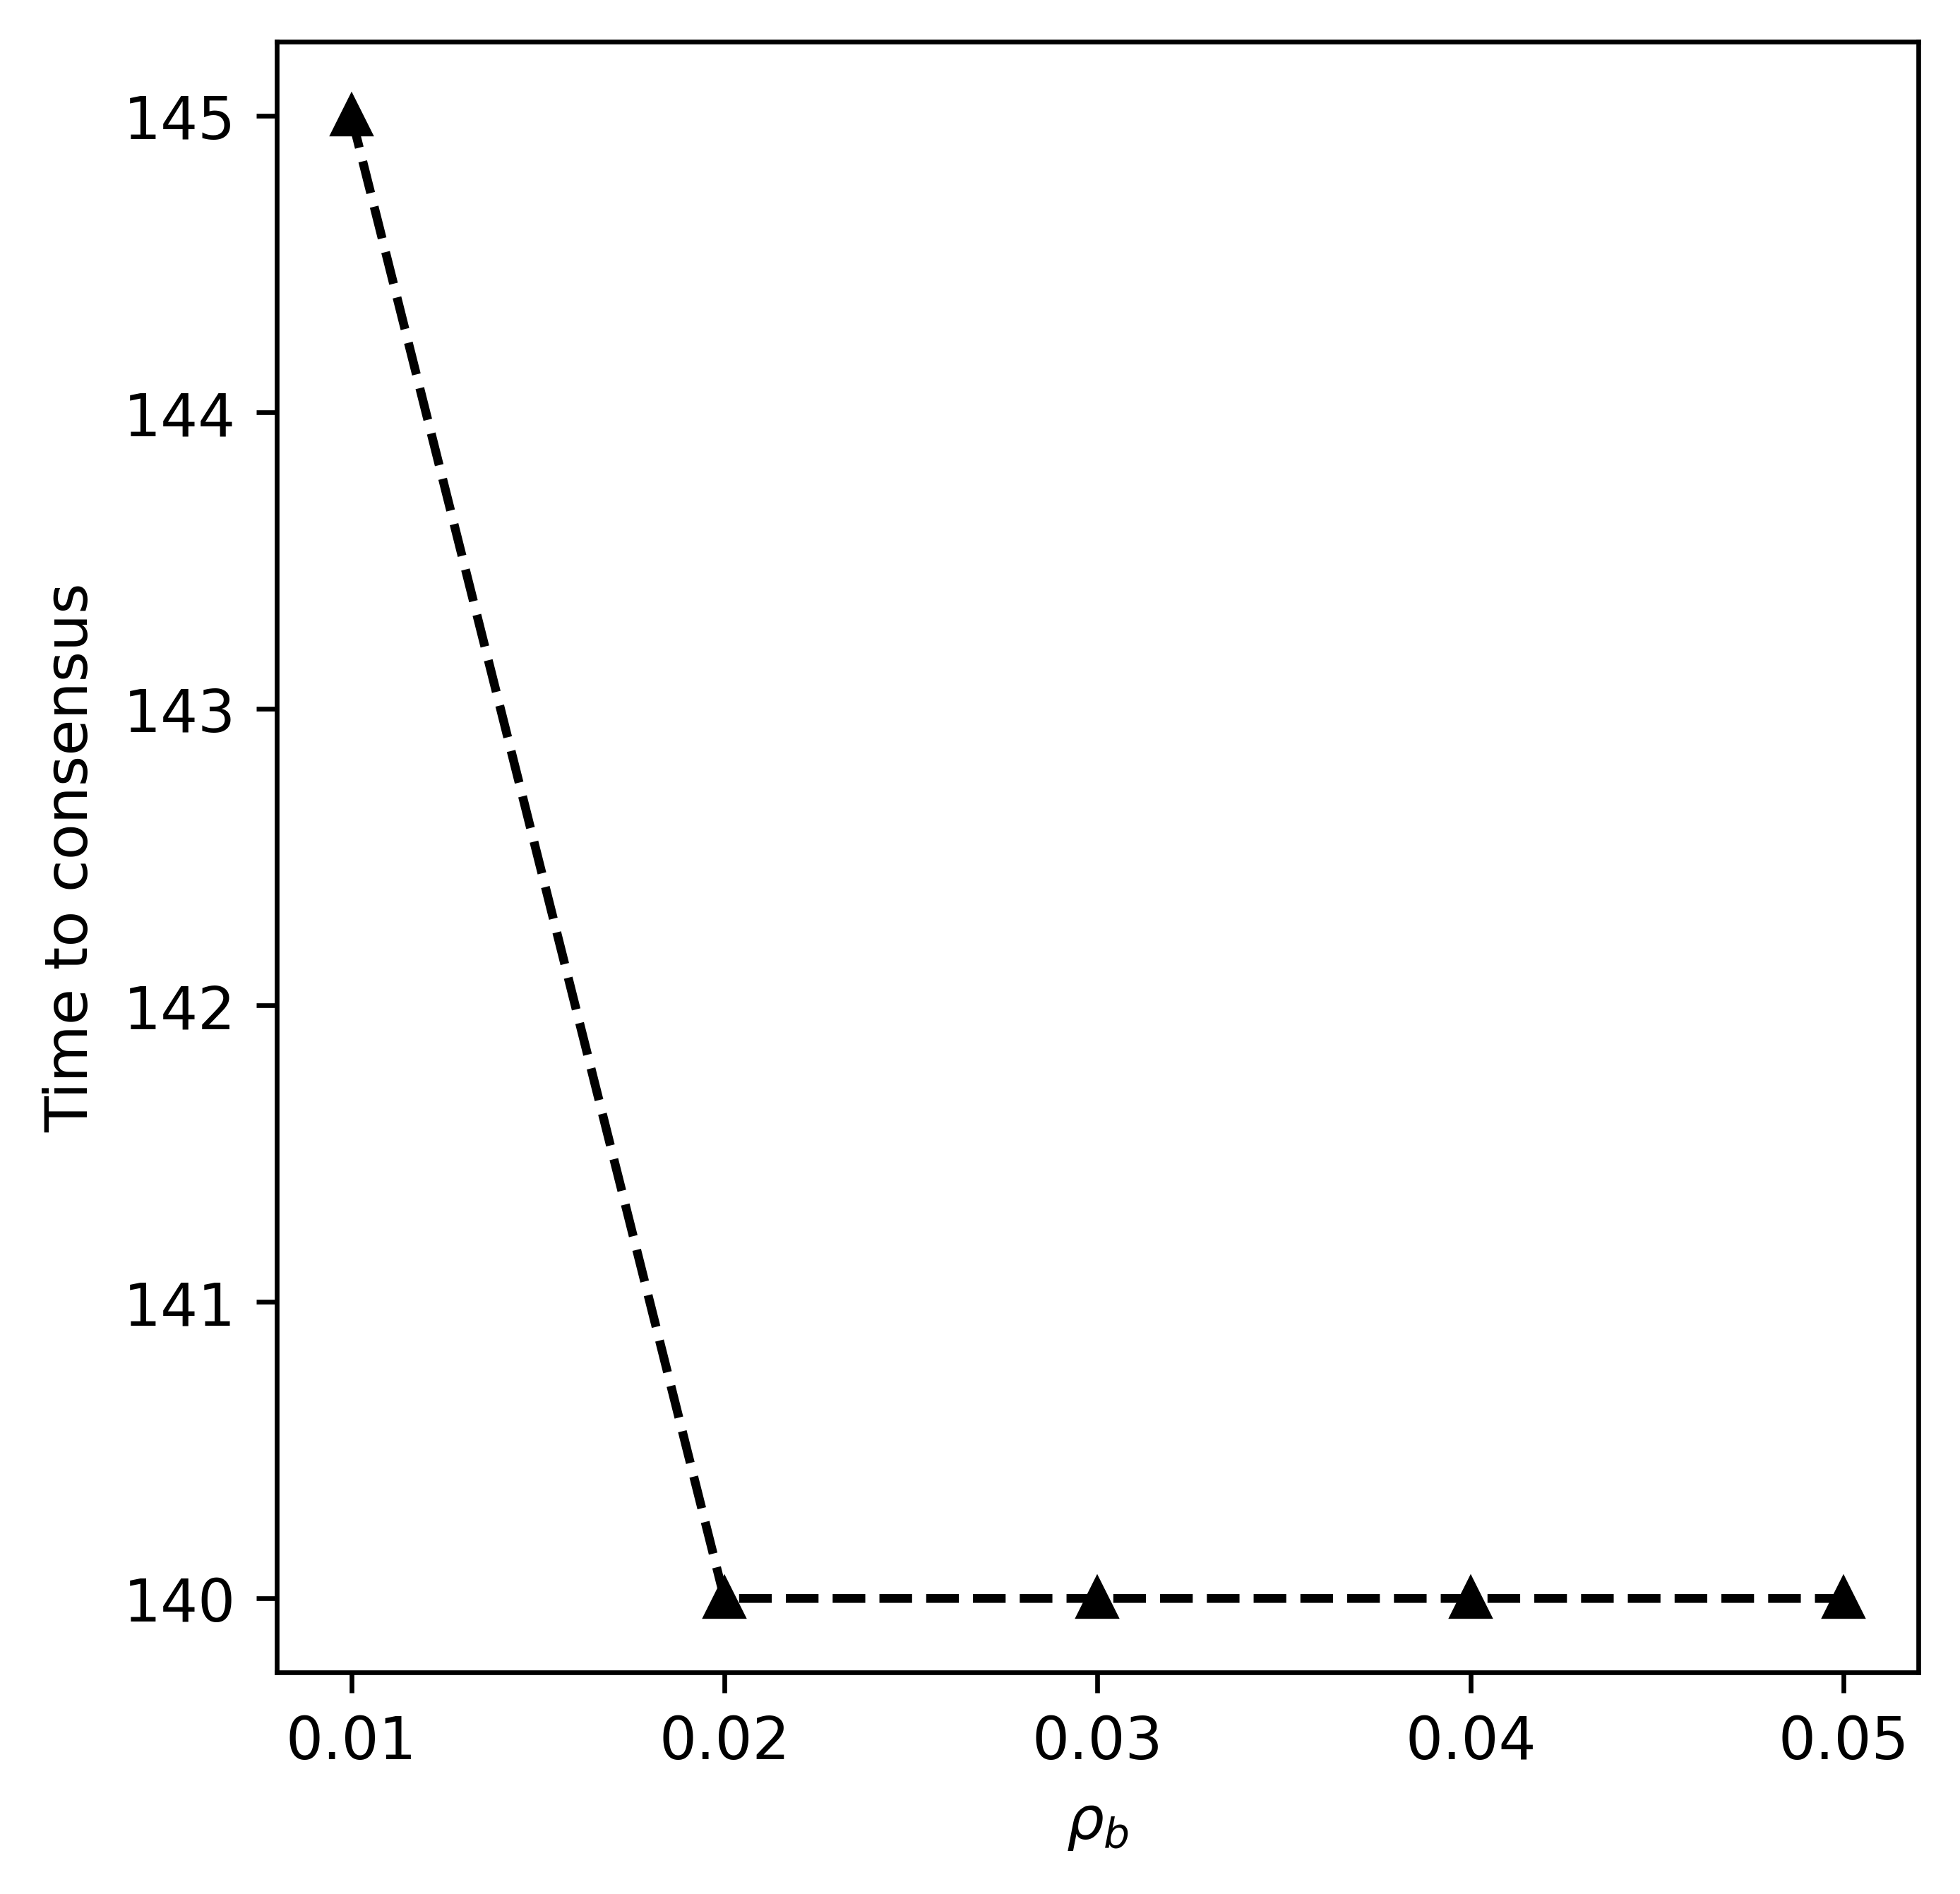

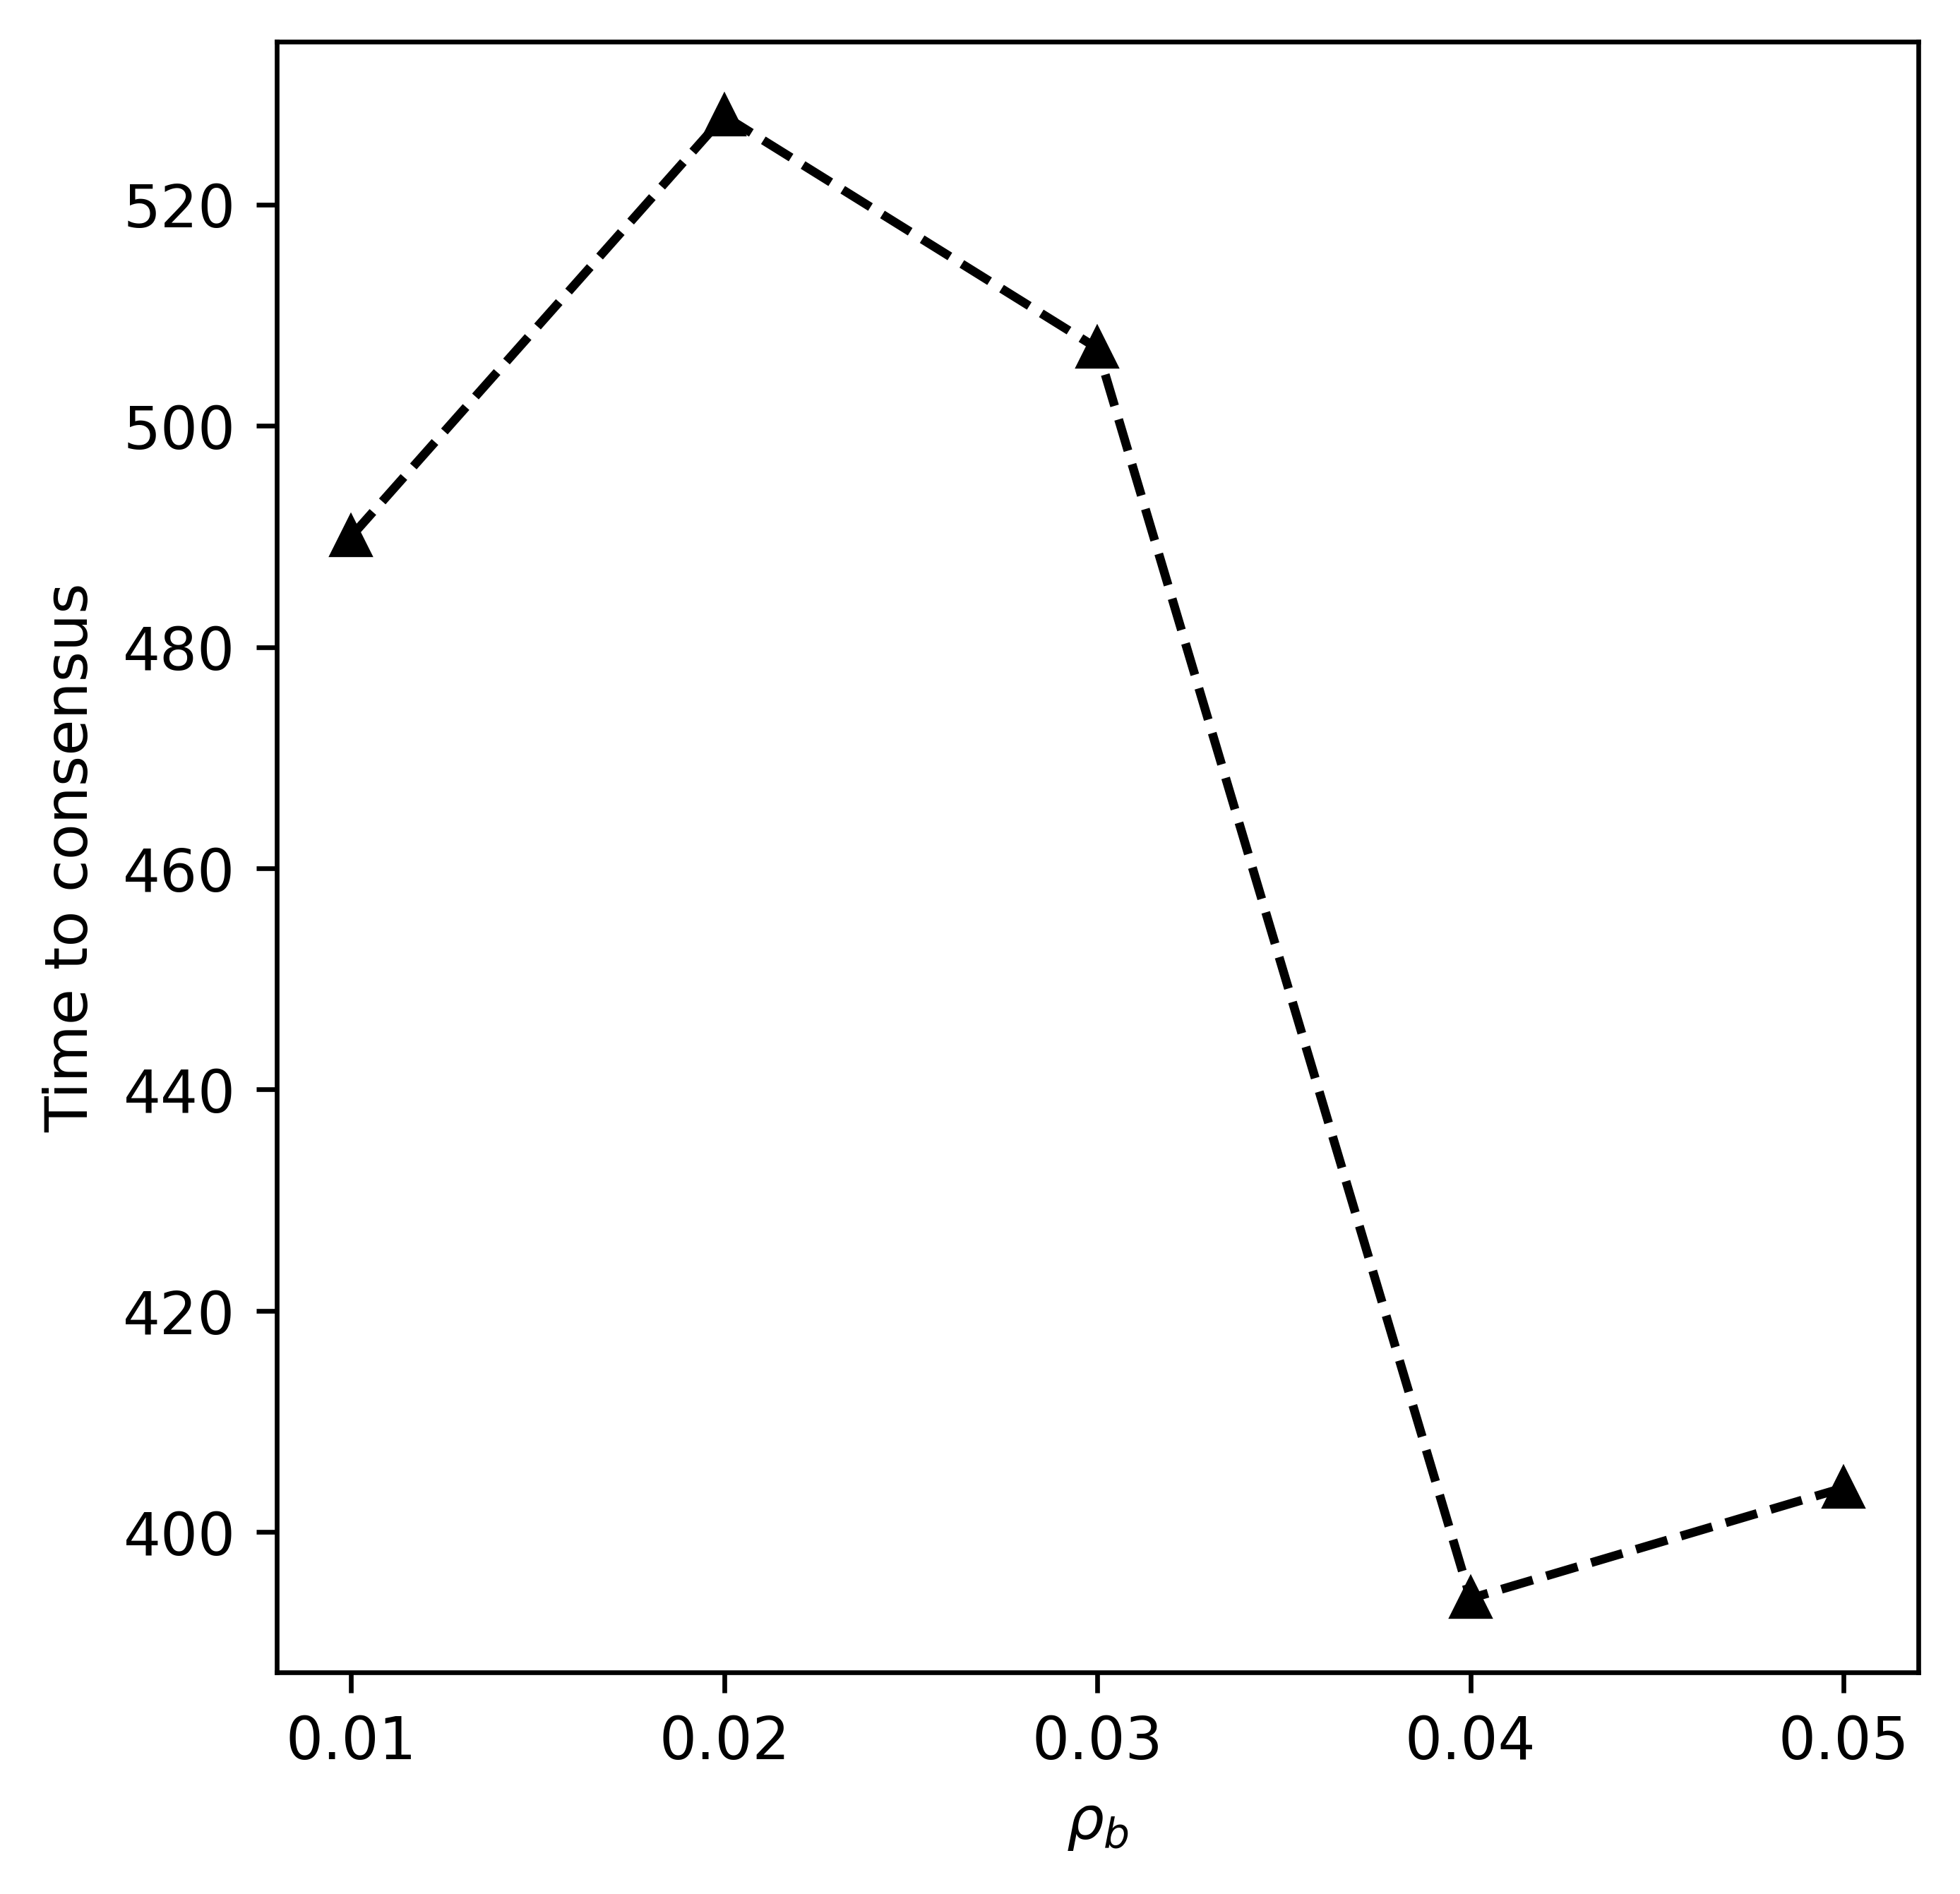

In [277]:
parameters = [0.01, 0.02, 0.03, 0.04, 0.05]
sparameters = ['1', '2', '3', '4', '5']


mrkr = '--'
count=0
for strategy in ['BBots-FP-', 'SProdOp-FP-', 'DMMD-FP-']:
    # Set up graph
    fig, ax = plt.subplots(1,1, figsize = (5,5), dpi=600)
    ttcs = []
    for parameter in sparameters:
        time_to = np.median(Results['TTC'][strategy + parameter])
        ttcs.append(time_to)
    ax.plot(parameters, ttcs, '^', linestyle=mrkr, color='k')
    count += 1

    # Formatting
    ax.set_xticks(parameters)
    ax.set_ylabel('Time to consensus')
    ax.set_xlabel('$ρ_b$')


plt.show()

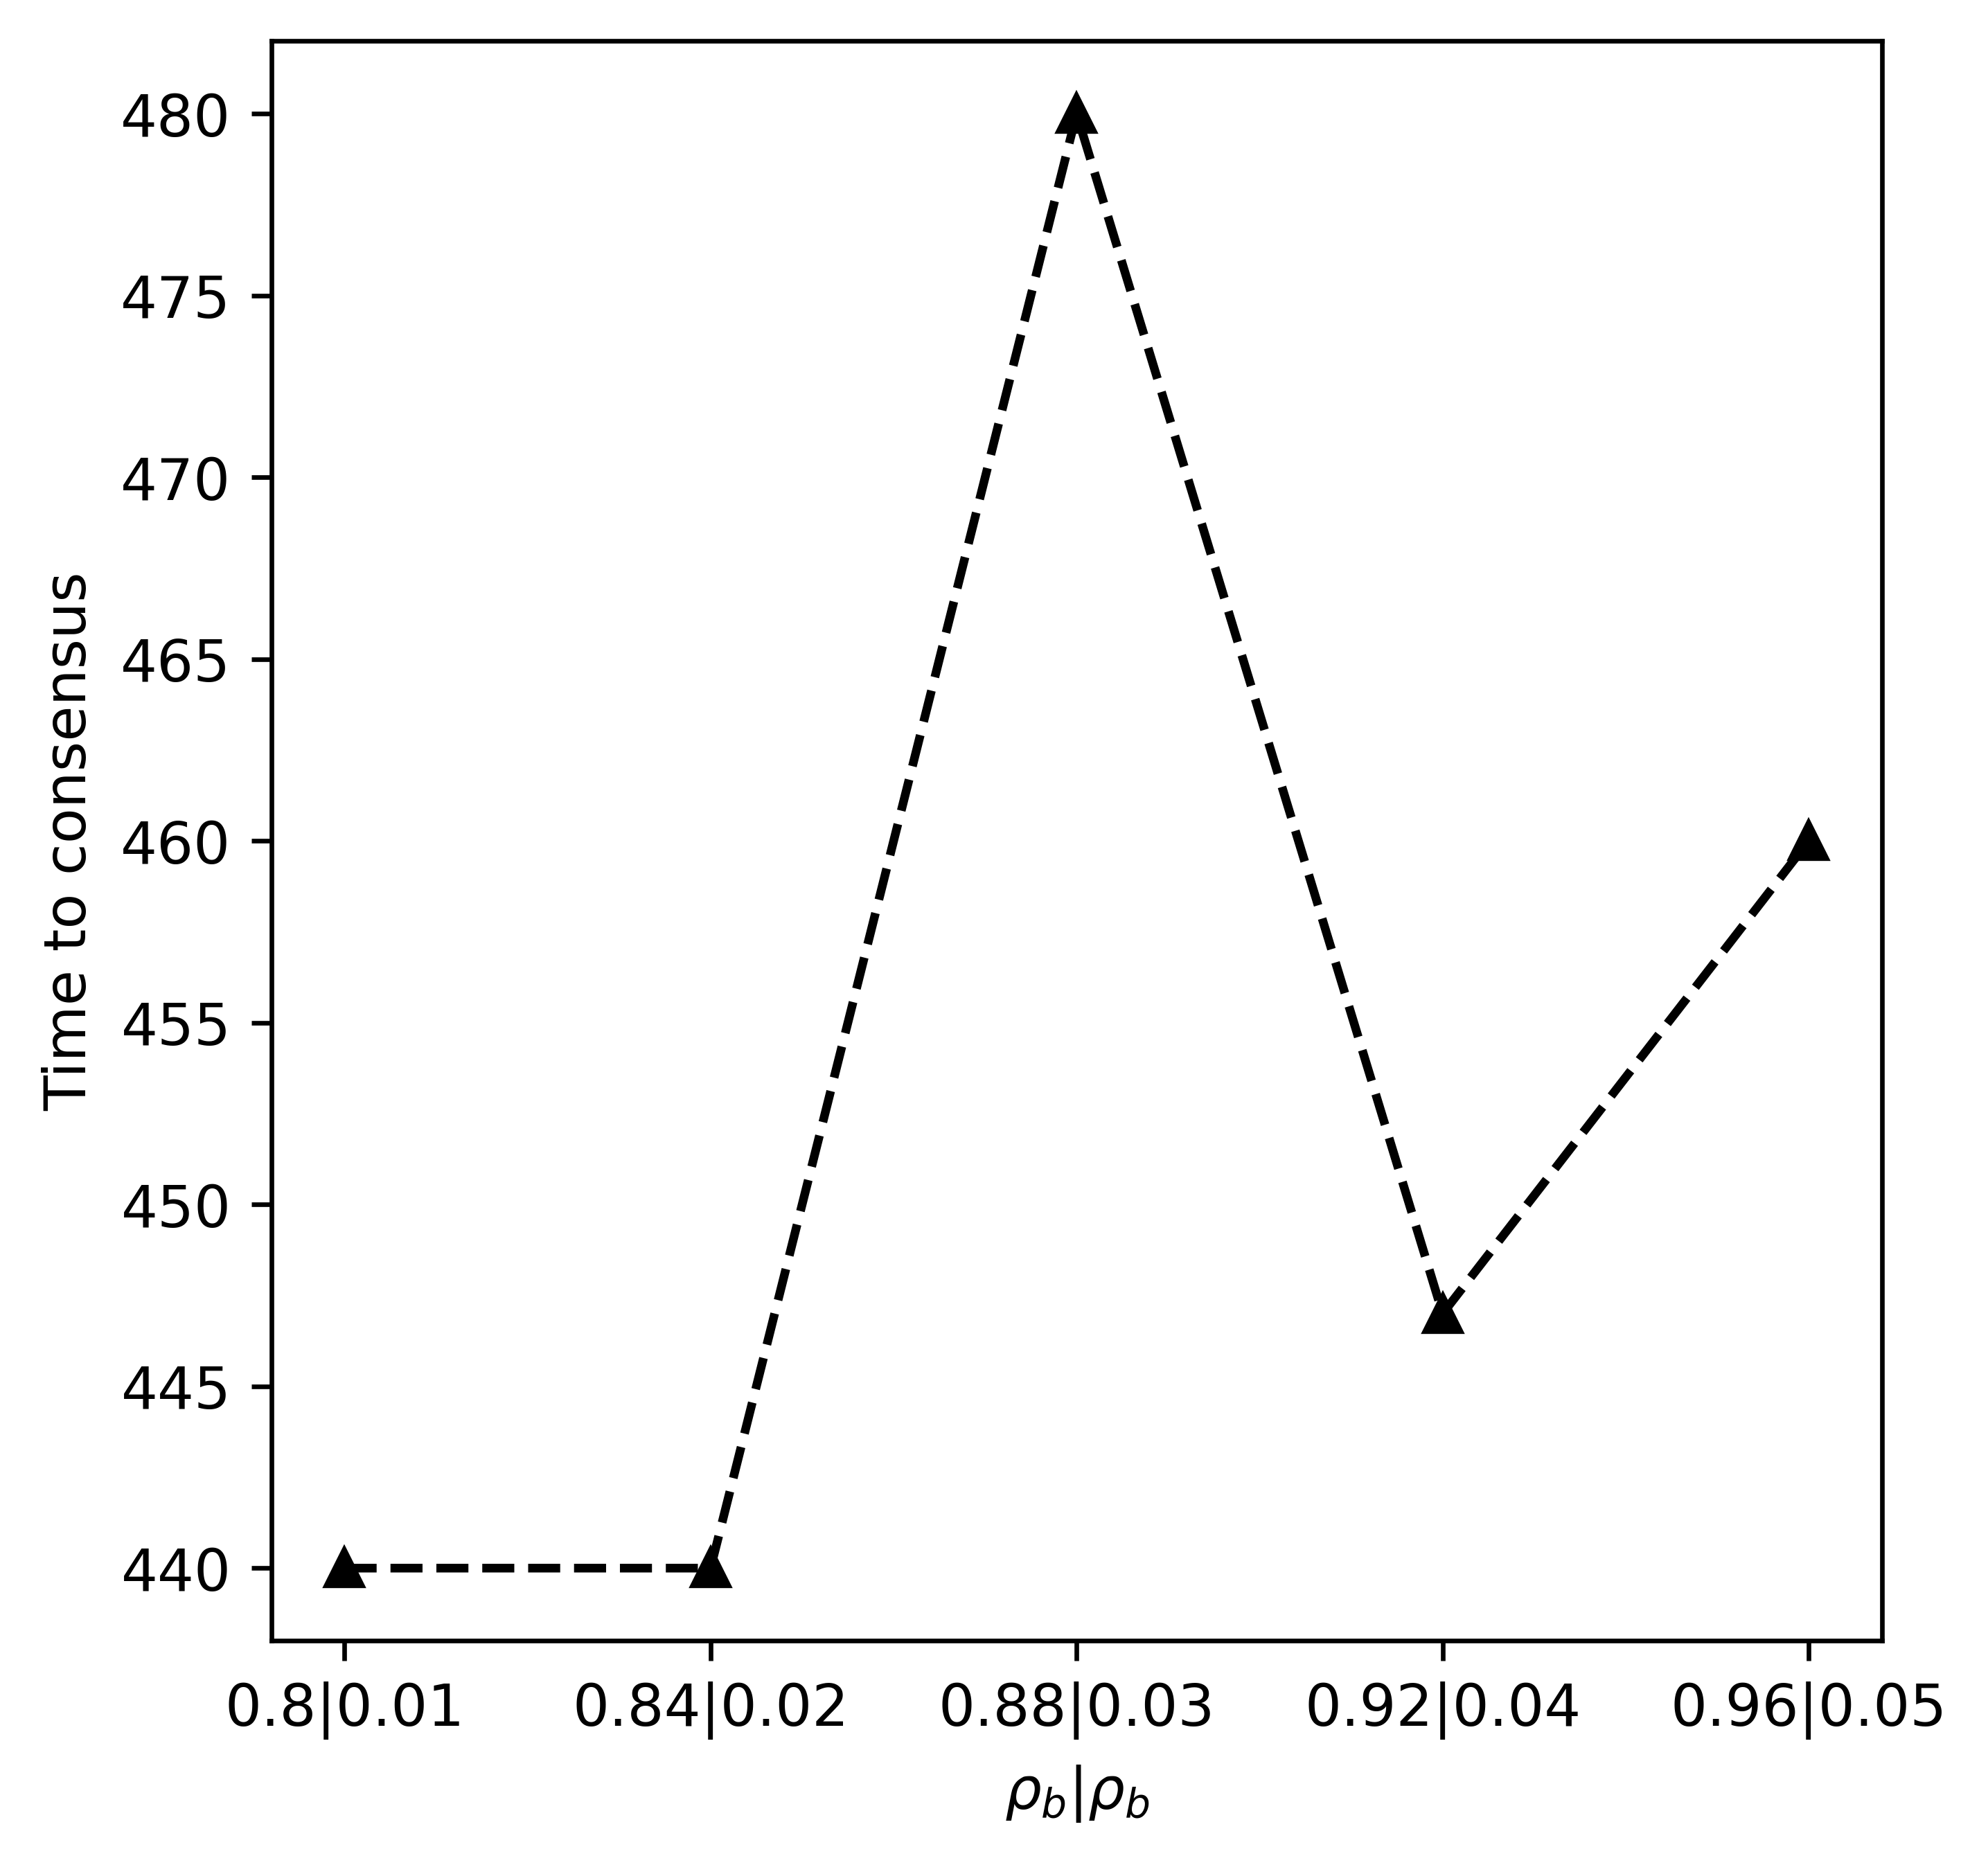

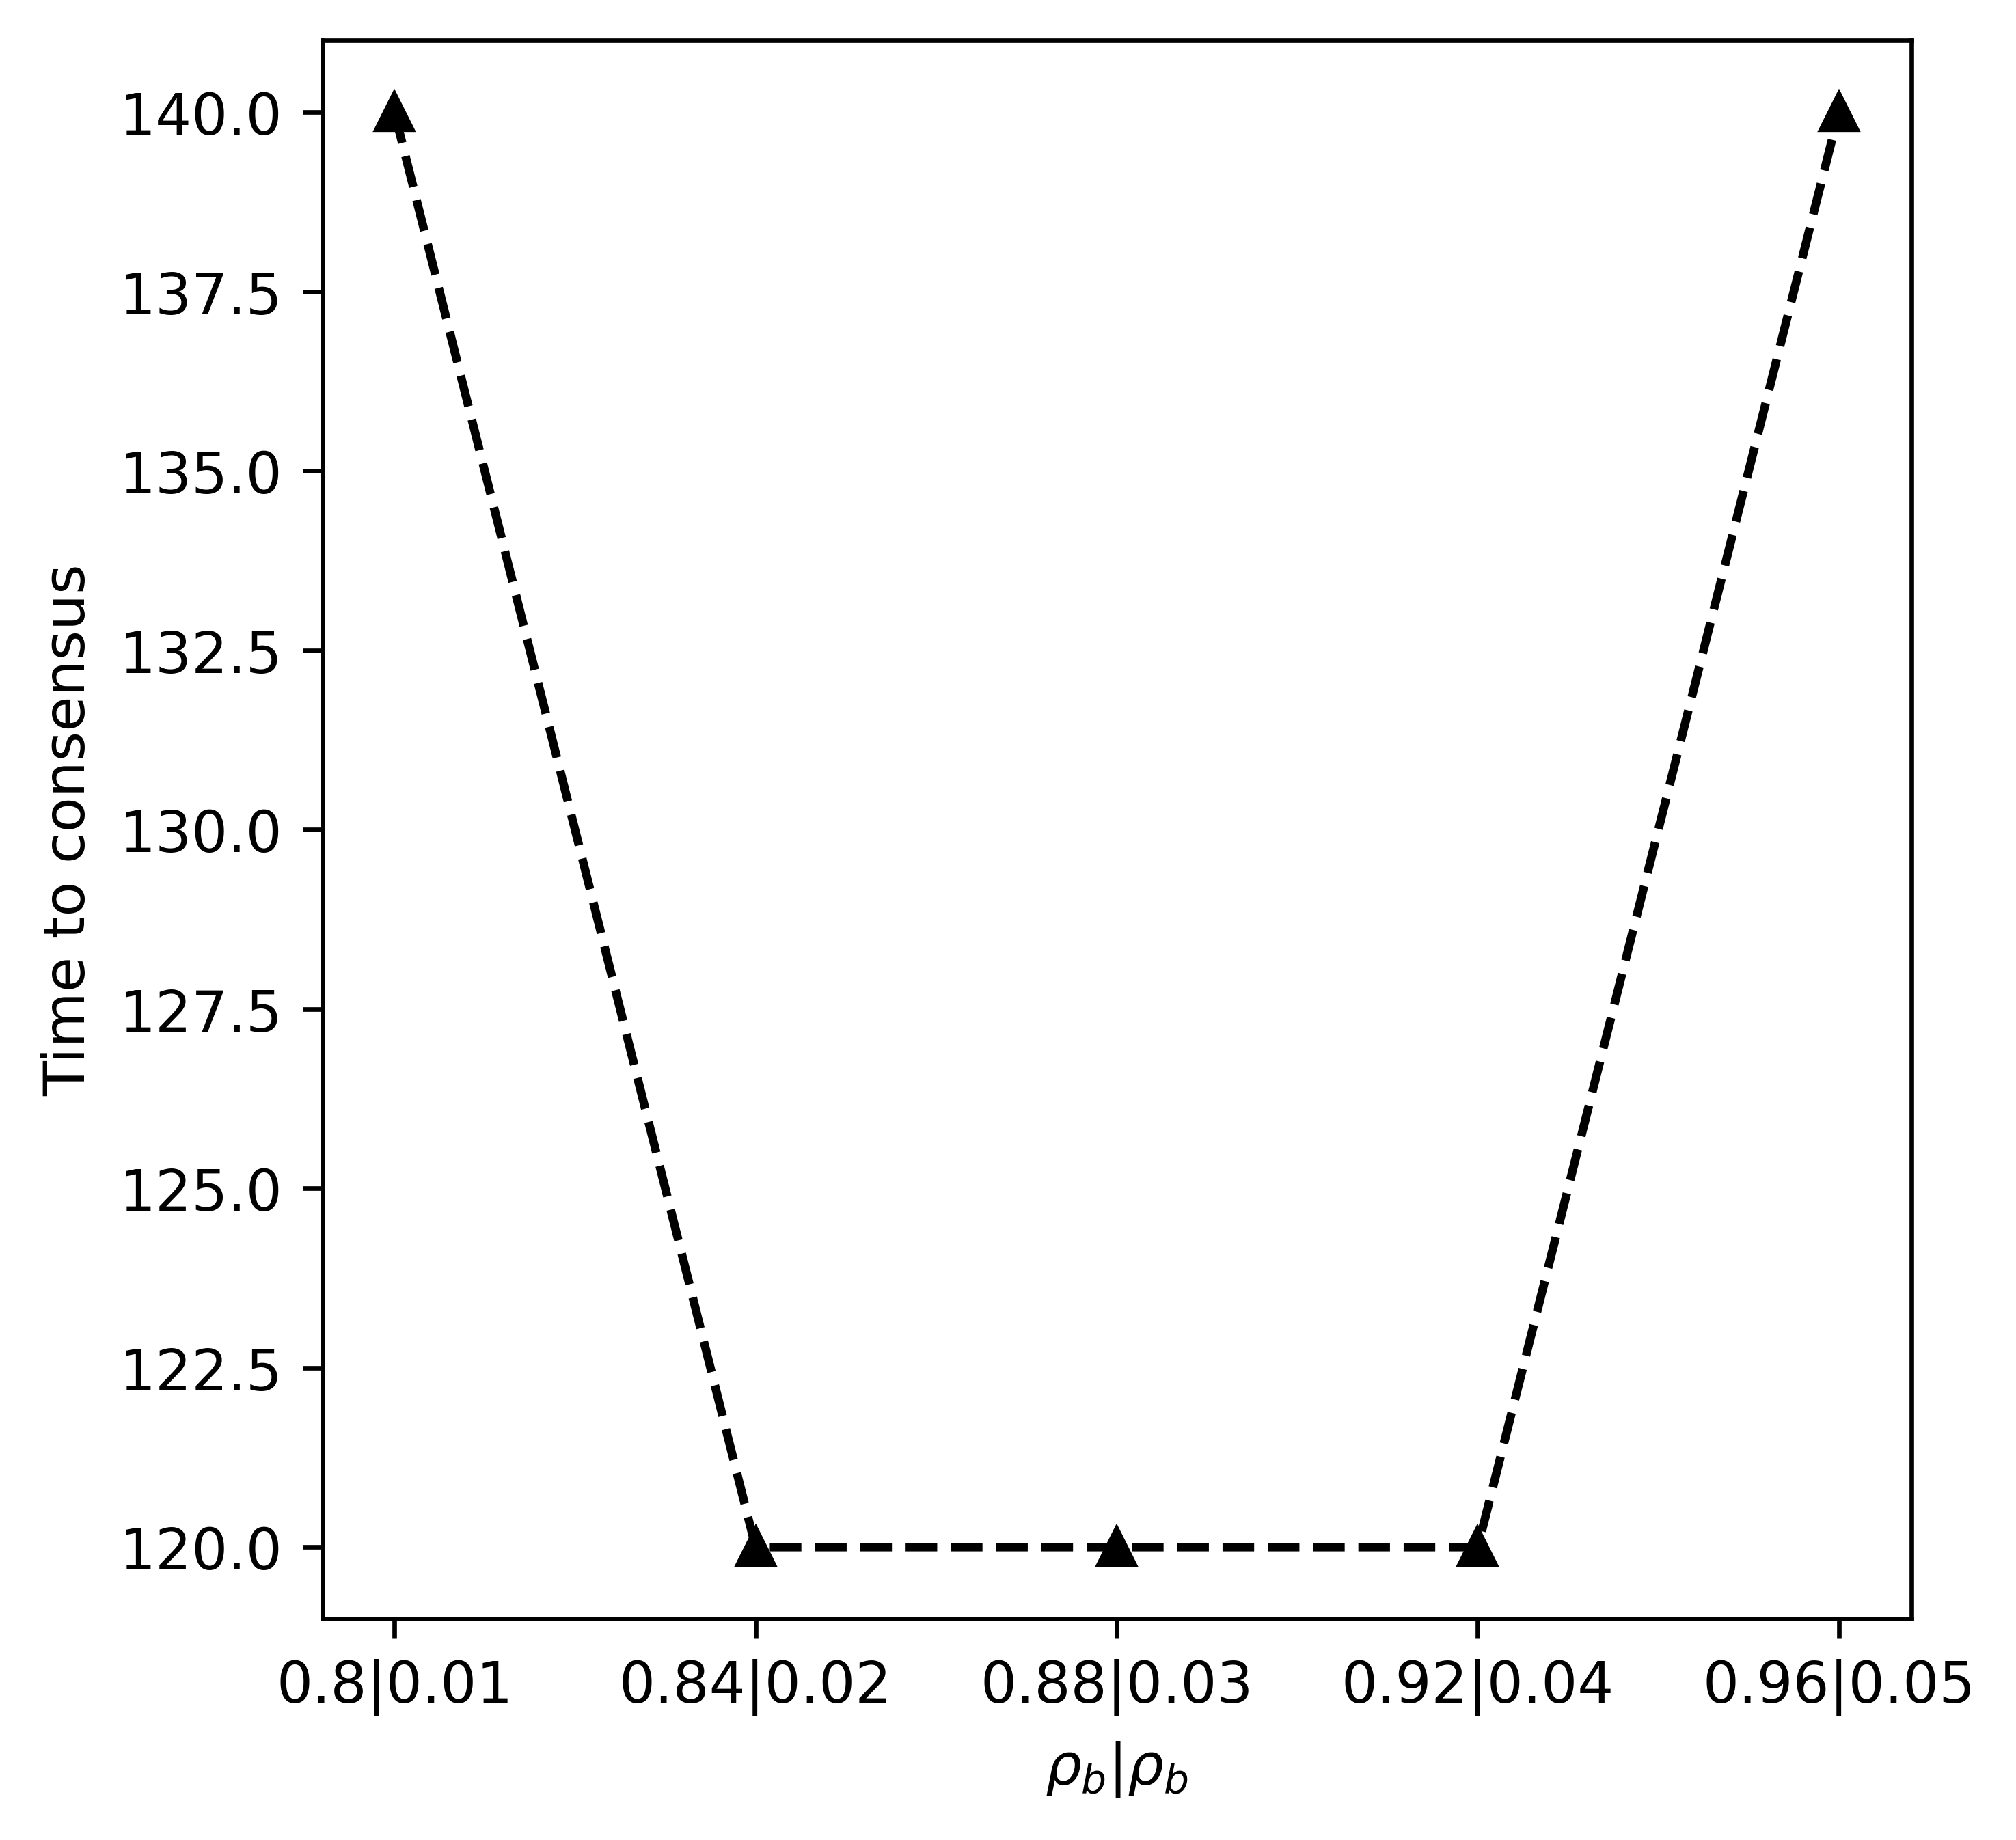

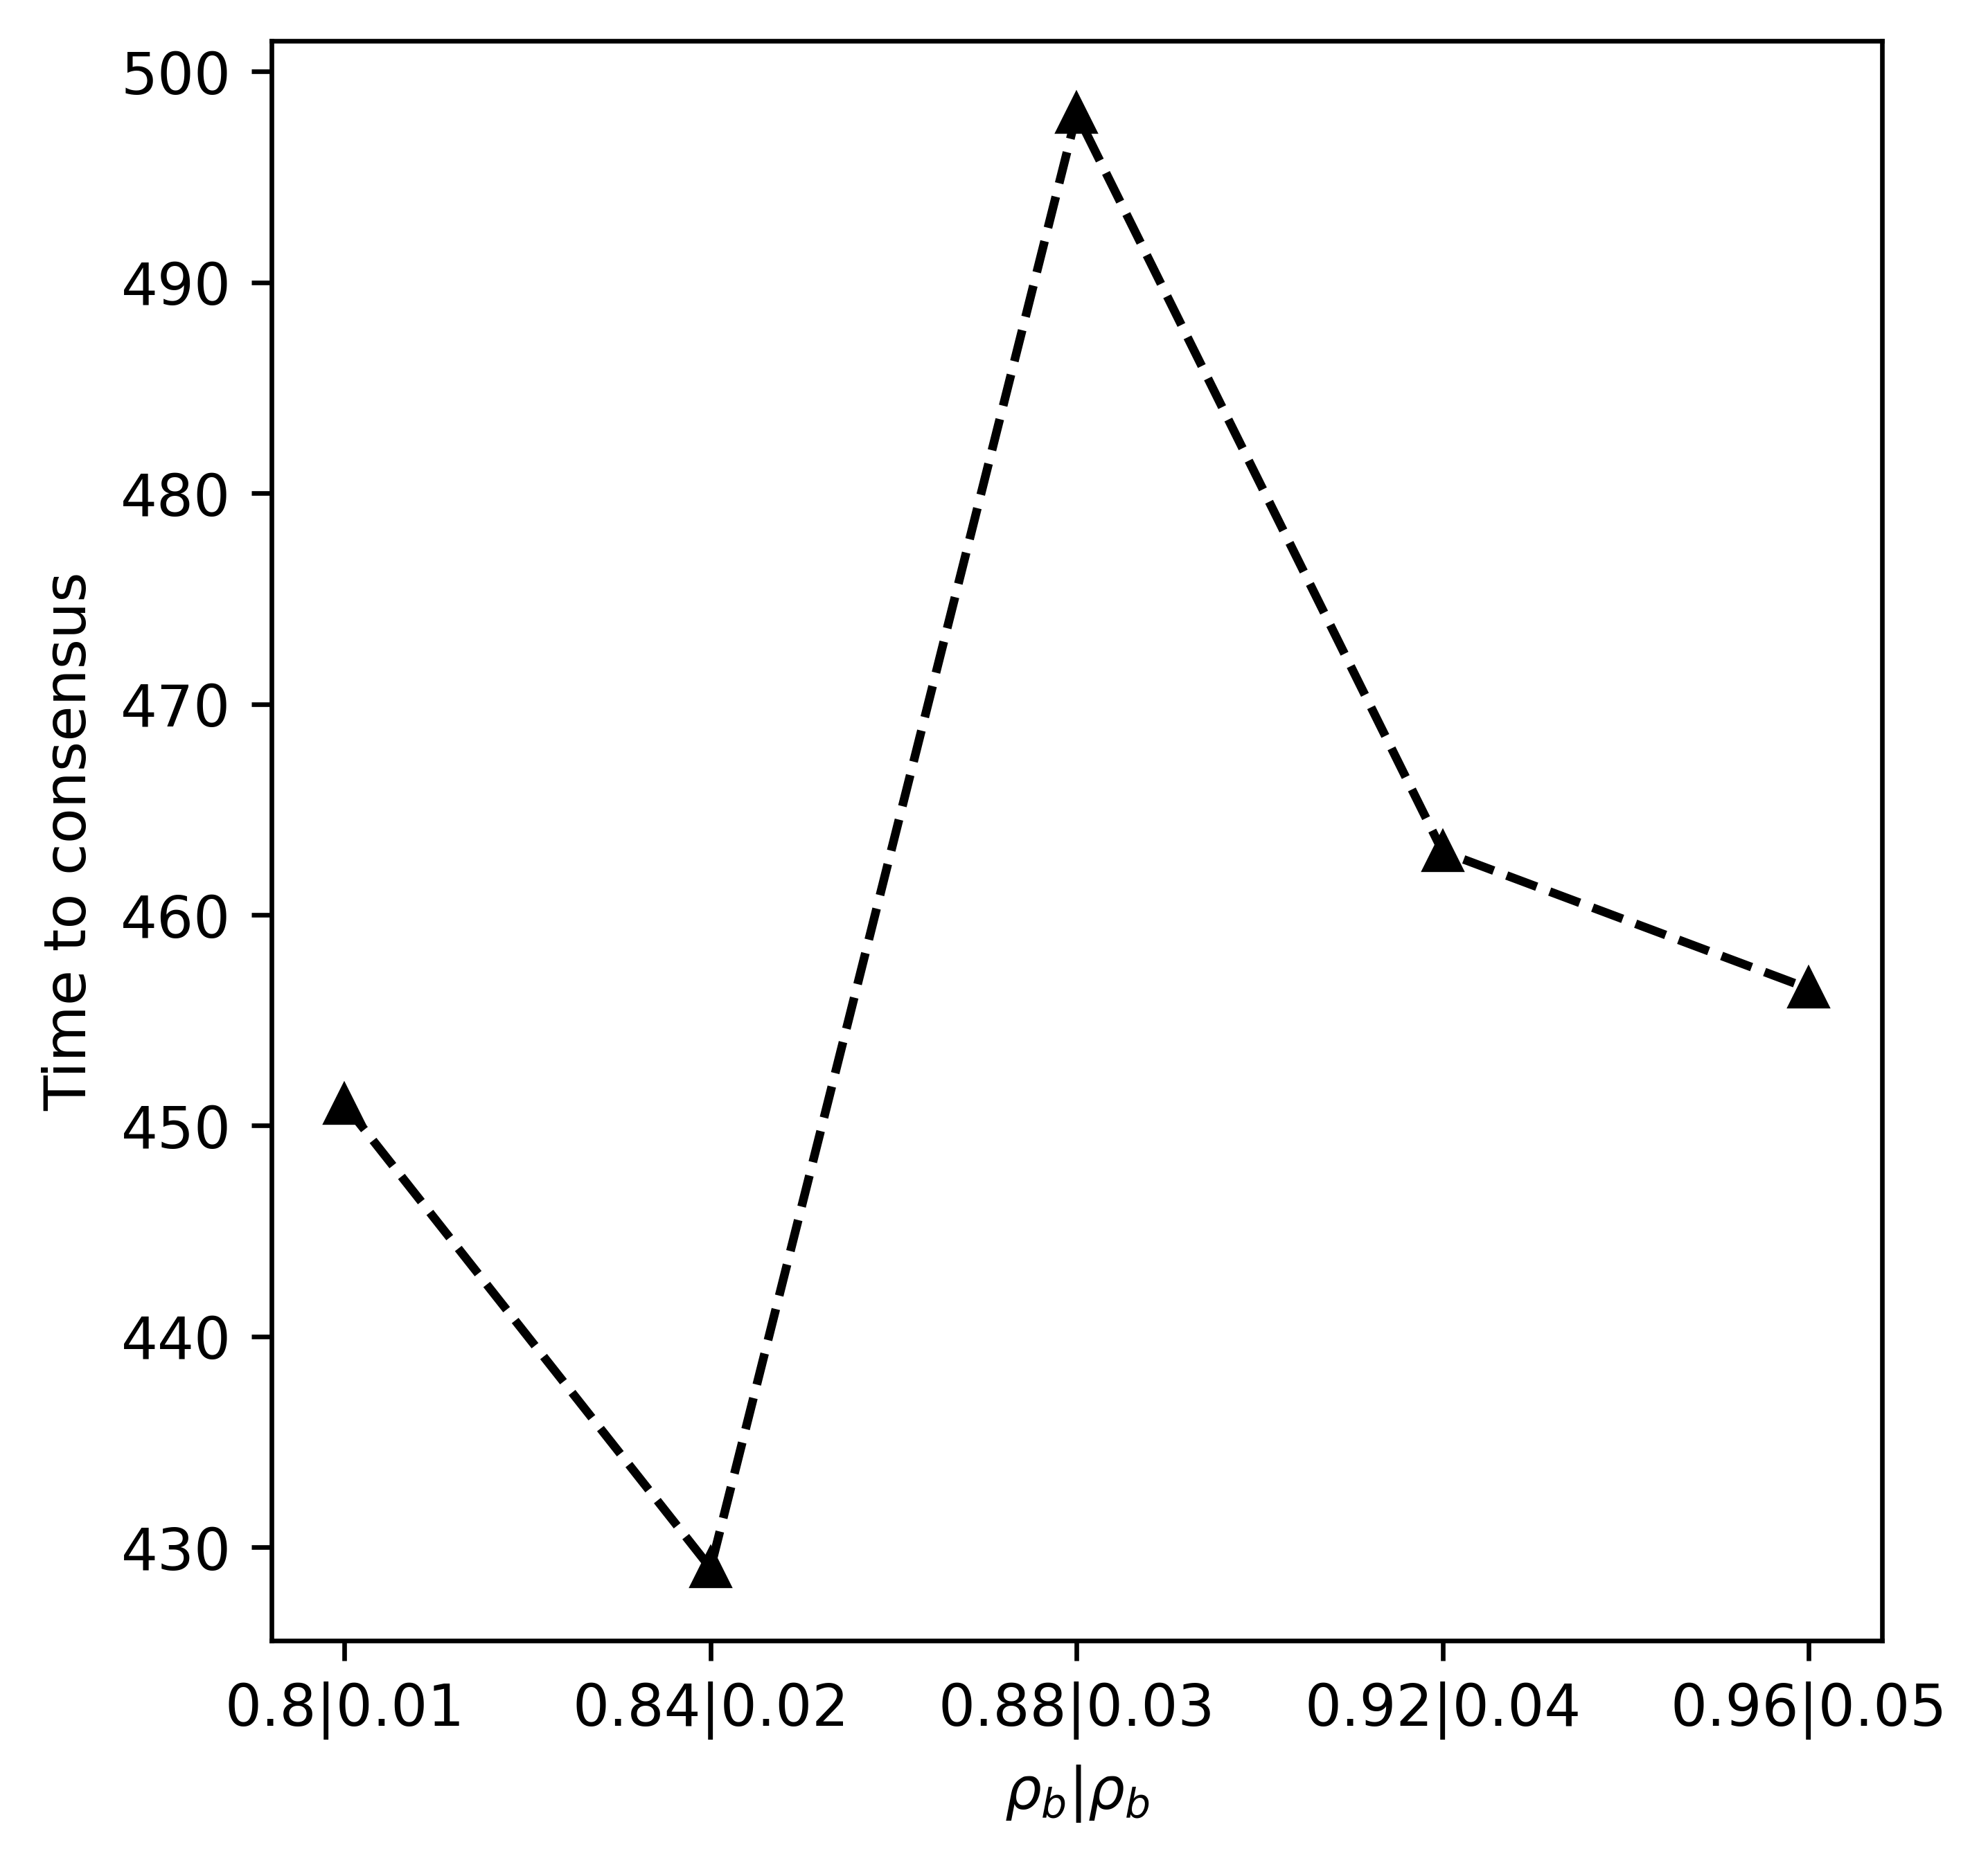

In [278]:
import matplotlib.pyplot as plt

parameters = [0.01, 0.02, 0.03, 0.04, 0.05]
sparameters = ['80-1', '84-2', '88-3', '92-4', '96-5']

mrkr = '--'
count=0
for strategy in ['BBots-', 'SProdOp-', 'DMMD-']:
    # Set up graph
    fig, ax = plt.subplots(1,1, figsize = (5,5), dpi=600)
    ttcs = []
    for parameter in sparameters:
        time_to = np.median(Results['TTC'][strategy + parameter])
        ttcs.append(time_to)
    ax.plot(parameters, ttcs, '^', linestyle=mrkr, color='k')
    count += 1

    ax.set_xticks(parameters)
    ax.set_xticklabels(['0.8|0.01', '0.84|0.02', '0.88|0.03', '0.92|0.04', '0.96|0.05'])

    # Formatting
    ax.set_ylabel('Time to consensus')
    ax.set_xlabel('$ρ_b | ρ_b$')


plt.show()

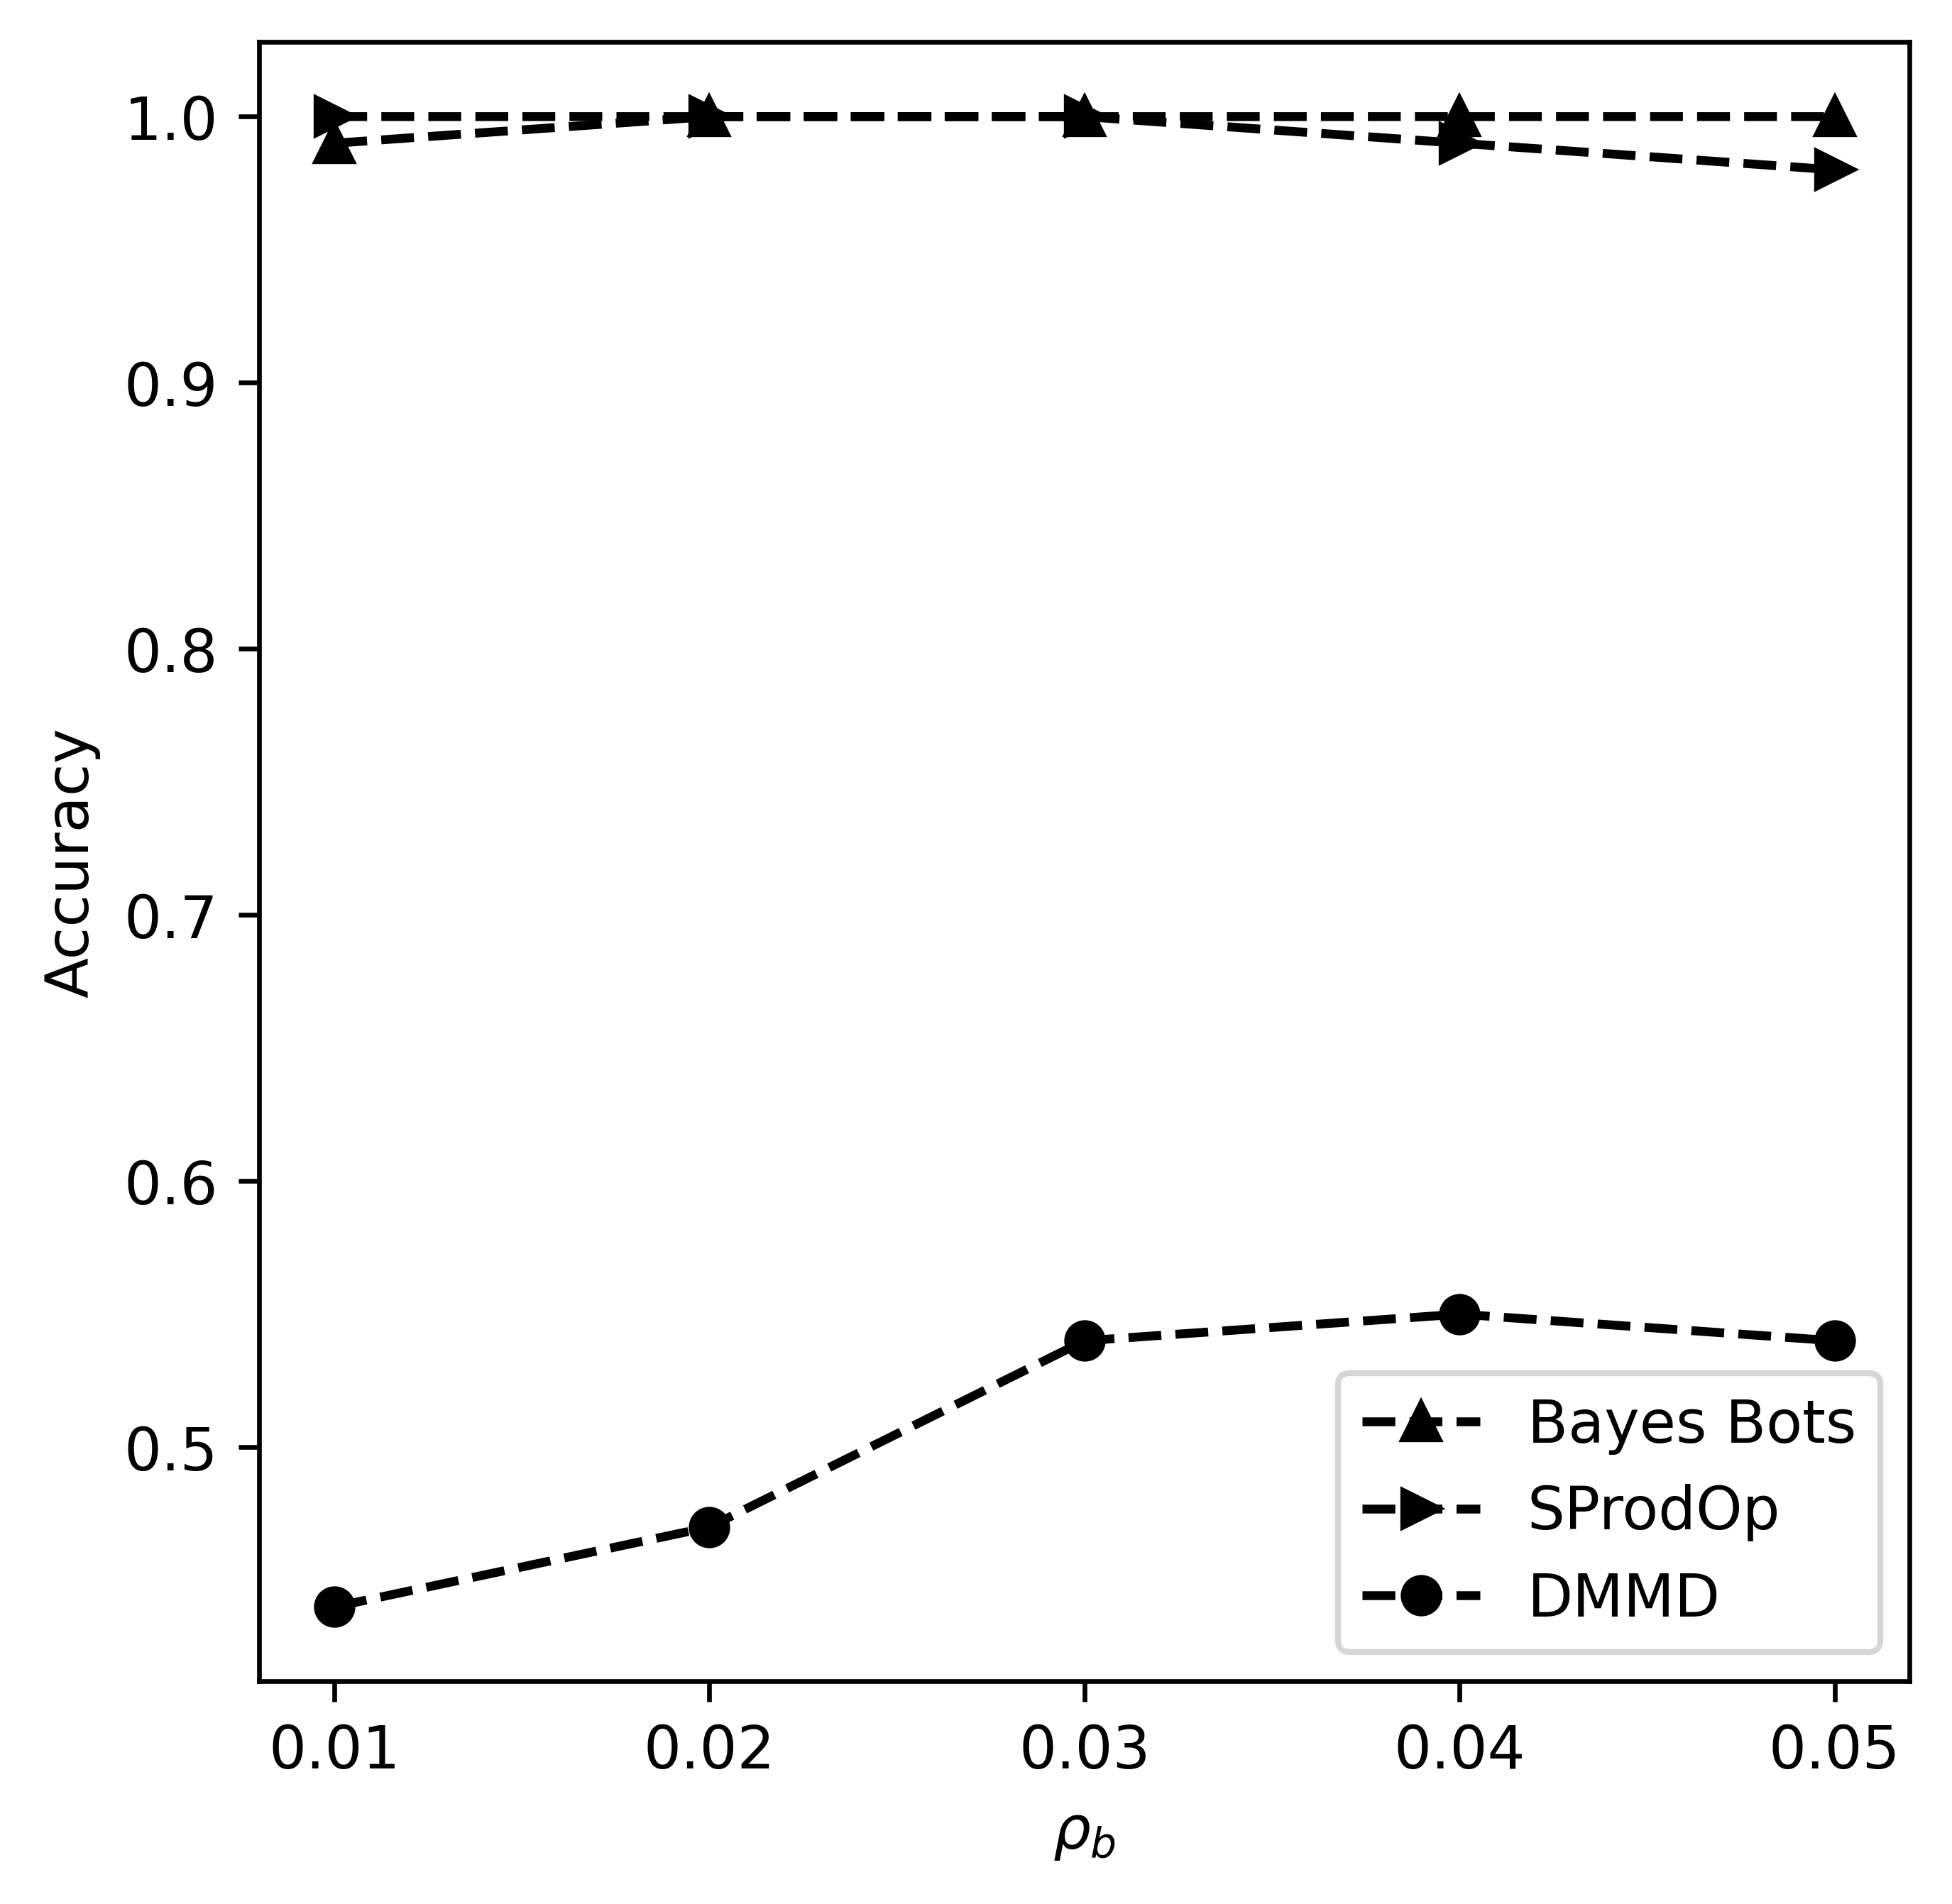

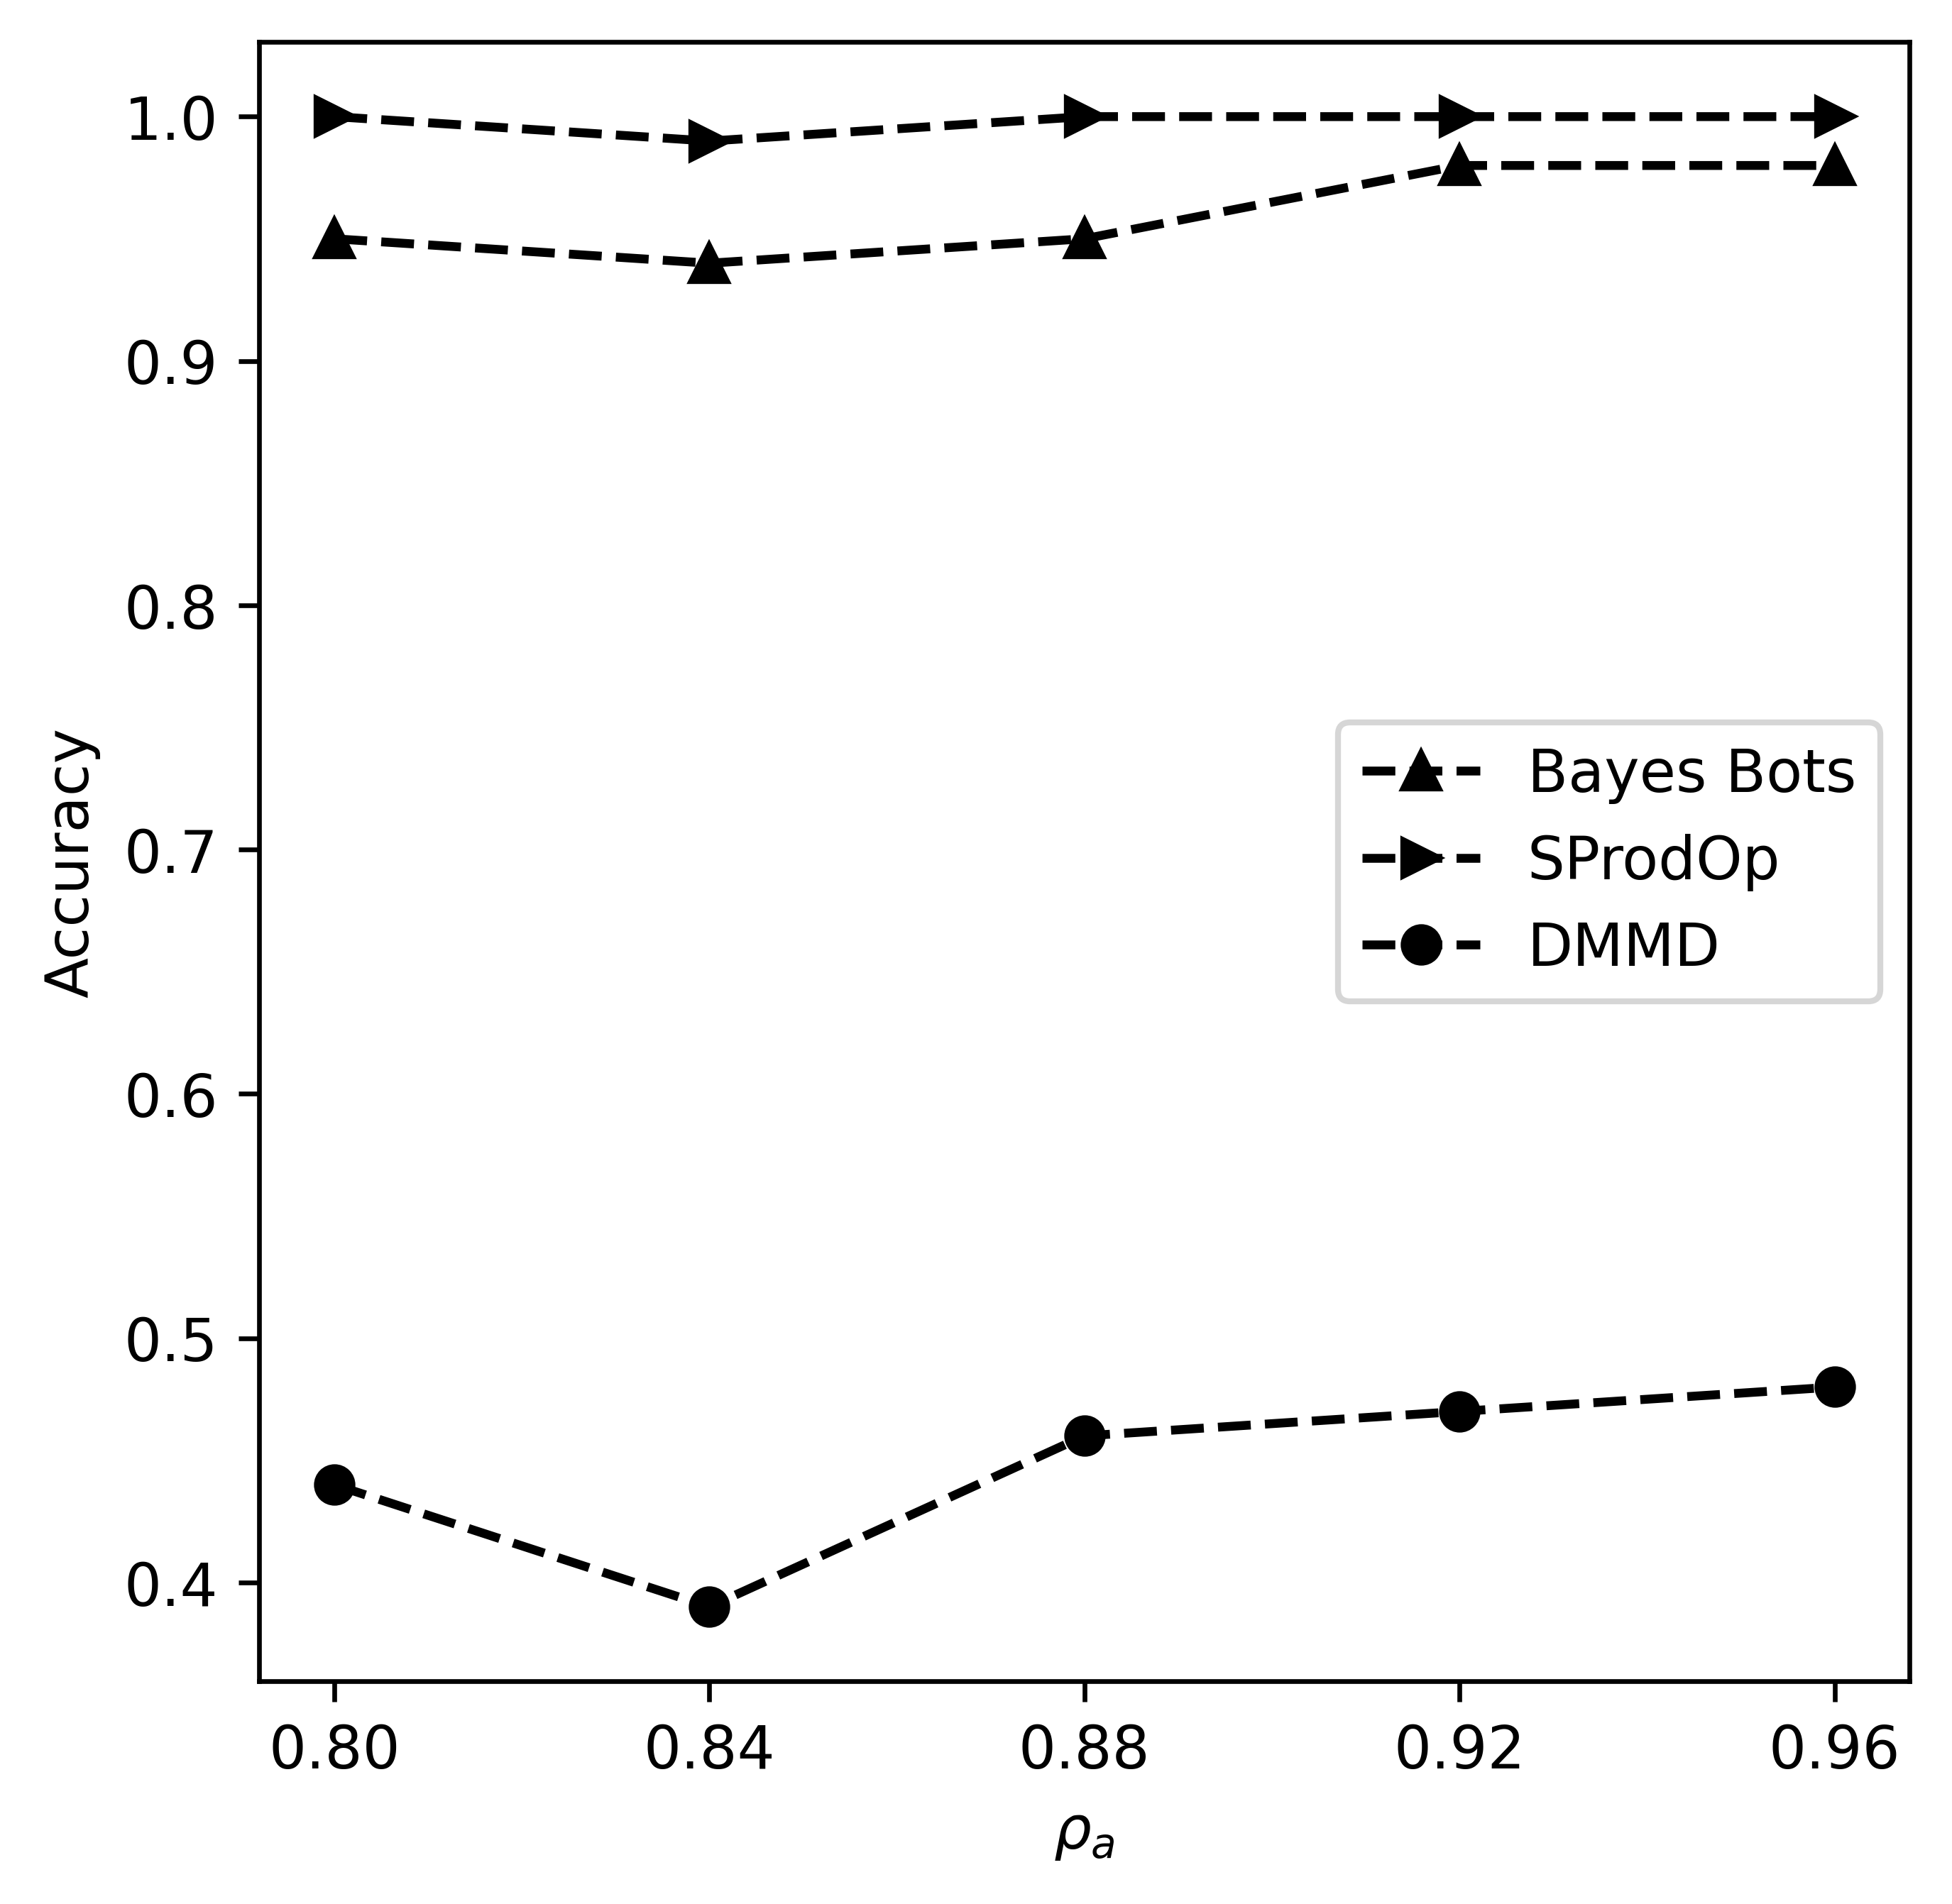

In [279]:
mark = ['^', '>', 'o']
labels = ["Bayes Bots", "SProdOp", "DMMD"]

parameters = [0.01, 0.02, 0.03, 0.04, 0.05]
fig, ax = plt.subplots(1,1,figsize = (5,5), dpi=600)
sparameters = ['1', '2', '3', '4', '5']
for i, strategy in enumerate(['BBots-FP-', 'SProdOp-FP-', 'DMMD-FP-']):
    accs = []
    for parameter in sparameters:
        accs.append(len(Results['TTC'][strategy + parameter])/100)
    ax.plot(parameters, accs, mark[i], linestyle=mrkr, color='k', label=labels[i])

ax.set_xticks(parameters)
ax.set_ylabel('Accuracy')
ax.set_xlabel('$ρ_b$')
ax.legend()


parameters = [0.8, 0.84, 0.88, 0.92, 0.96]
sparameters = ['80', '84', '88', '92', '96']
fig, ax = plt.subplots(1,1,figsize = (5,5), dpi=600)
for i, strategy in enumerate(['BBots-TP-', 'SProdOp-TP-', 'DMMD-TP-']):
    accs = []
    for parameter in sparameters:
        accs.append(len(Results['TTC'][strategy + parameter])/100)
    ax.plot(parameters, accs, mark[i], linestyle=mrkr, color='k', label=labels[i])

ax.set_xticks(parameters)
ax.set_ylabel('Accuracy')
ax.set_xlabel('$ρ_a$')
ax.legend()


fig, ax = plt.subplots(1,1,figsize = (5,5), dpi=600)
parameters = [0.01, 0.02, 0.03, 0.04, 0.05]
sparameters = ['80-1', '84-2', '88-3', '92-4', '96-5']
for i, strategy in enumerate(['BBots-', 'SProdOp-', 'DMMD-']):
    accs = []
    for parameter in sparameters:
        accs.append(len(Results['TTC'][strategy + parameter])/100)
    ax.plot(parameters, accs, mark[i], linestyle=mrkr, color='k', label=labels[i])

ax.set_xticks(parameters)
ax.set_xticklabels(['0.8|0.01', '0.84|0.02', '0.88|0.03', '0.92|0.04', '0.96|0.05'])
ax.set_ylabel('Accuracy')

ax.set_xlabel('$ρ_b | ρ_b$')
ax.legend()

plt.show()

    

# TP, FP Figure making

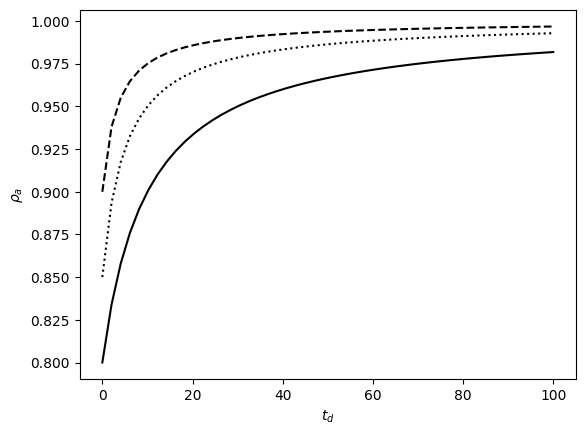

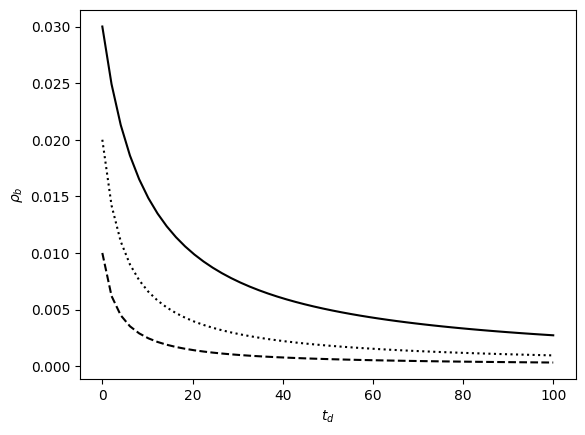

In [ ]:
def get_true_positive(init_tp, tracking_time, alpha=0.2):
    """
    Get the true positive rate for a given time having tracked
    """
    true_positive = (init_tp + alpha*tracking_time)/(1 + alpha*tracking_time)
    return true_positive

def get_false_positive(init_fp, tracking_time, alpha=0.2):
    """
    Get the false positive rate for a given time having tracked
    """
    false_positive = 1 - ((1 - init_fp + alpha*tracking_time)/(1 + alpha*tracking_time))
    return false_positive

t = np.linspace(0,100)
tp = []

tp_parameter_pairs = [(0.8, 0.1), (0.85, 0.2), (0.9, 0.3)]


marker_style_idx = 0
markers = ['solid', 'dotted', 'dashed']
for pair in tp_parameter_pairs:
    for time in t:
        tp.append(get_true_positive(pair[0], time, pair[1]))
    plt.plot(t,tp, c='black', linestyle=markers[marker_style_idx])
    marker_style_idx += 1
    tp.clear()

plt.xlabel('$t_d$')
plt.ylabel('$ρ_a$')
plt.savefig('TP.png', dpi=600)
plt.show()

fp = []

fp_parameter_pairs = [(0.03, 0.1), (0.02, 0.2), (0.01, 0.3)]

marker_style_idx = 0

for pair in fp_parameter_pairs:
    for time in t:
        fp.append(get_false_positive(pair[0], time, pair[1]))
    plt.plot(t,fp, c='black', linestyle=markers[marker_style_idx])
    marker_style_idx += 1
    fp.clear()

plt.xlabel('$t_d$')
plt.ylabel('$ρ_b$')
plt.savefig('FP.png', dpi=600)
plt.show()
